In [349]:
import pandas as pd
import numpy as np

full_review_play = pd.read_csv("full_review_play.csv").iloc[:,1:]

full_review_play = full_review_play.sort_values("closedate_ifclose")

### This one looks just at the last few years, the effect is diminsihed
full_review_play_2 = full_review_play[full_review_play["year"]>2016]
#full_review_play_2 = full_review_play_2[full_review_play_2["year"]<2017]

In [350]:
full_review_play_2["state"].unique()

array(['ON', 'OH', 'QC', 'PA', 'IL', 'EDH', 'WI', '0', 'AZ', 'NV', 'NC',
       'BW', 'C', 'CHE', 'NI', 'SC', 'MLN', 'HLD', 'NY', 'IN', 'AK',
       'NYK'], dtype=object)

In [351]:
# QC
# BW

In [352]:
full_review_new = full_review_play_2.drop(["business_id","name","year","state","closedate_ifclose"],axis=1).copy()

In [353]:
Y = full_review_new.pop("is_open")
Y = Y.astype(int)
X = full_review_new

X = X.drop(X.filter(regex="days|diffs").columns,axis=1)
#X["diffs_mean"] = full_review_new["diffs_mean"]
#X["days_mean"] = full_review_new["days_mean"]
#X["lat_long"] = full_review_new["latitude"] + full_review_new["longitude"]

In [354]:
Y.value_counts()

1    33471
0     2867
Name: is_open, dtype: int64

In [355]:
Y.value_counts()

1    33471
0     2867
Name: is_open, dtype: int64

In [356]:
Y.value_counts()

1    33471
0     2867
Name: is_open, dtype: int64

In [357]:
#full_review_s["days"] = full_review_s['yelping_since'] - datetime.now()

In [358]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score
import lightgbm as lgb

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
#########  X = X.iloc[:,lit]
#train = 0.67
train = 0.75
range_size = int(len(X)*train)
X_train, X_test, y_train, y_test = X.iloc[:range_size,:], X.iloc[range_size:,:], Y.iloc[:range_size], Y.iloc[range_size:]

d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [359]:
# This is what I expect a human to get 
Y.sum()/(Y.count())

#from lightgbm import LGBMClassifier


params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

#model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

model_full = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)



Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[245]	valid_0's binary_logloss: 0.148547


In [141]:
y_pred = model_full.predict(X_test)

In [136]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7281036112686708

In [144]:
from sklearn.metrics import confusion_matrix
y_pred_f = y_pred.round(0)
confusion_matrix = confusion_matrix(y_test, y_pred_f)


In [148]:
confusion_matrix = pd.DataFrame(confusion_matrix)

In [149]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.values.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [151]:
FPR

0    0.023256
1    0.792593
dtype: float64

In [150]:
FNR

0    0.792593
1    0.023256
dtype: float64

In [100]:
accuracy_score(y_test, y_pred_f)

0.9645569620253165

In [129]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_f)

1.5953025650084716

In [96]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_f)

1.2051708116888353

In [142]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred,average="macro")

0.9891614775277572

In [267]:
colly = shape3.head(25).index.values
colly = list(colly)

In [273]:
X.head()

rating_std  rating_min  rating_sum  rating_mean  rating_max  gender_std  \
5323    1.224745         2.0        15.0     3.000000         5.0    0.547723   
5327    1.235168         1.0        42.0     3.230769         5.0    0.518875   
5326    1.834848         1.0        13.0     2.166667         5.0    0.408248   
5325    0.995227         1.0        79.0     3.761905         5.0    0.511766   
5324    1.114641         1.0        22.0     1.833333         4.0    0.492366   

      gender_min  gender_sum  gender_mean  gender_max     ...       \
5323           0           2     0.400000           1     ...        
5327           0           7     0.538462           1     ...        
5326           0           5     0.833333           1     ...        
5325           0          11     0.523810           1     ...        
5324           0           8     0.666667           1     ...        

      Outdoor Seating_chain_std  Delivery_chain_std  Caters_chain_std  \
5323                   0.000000                 0.0          0.500000   
5327                   0.000000                 0.0          0.000000   
5326                   0.231149                 0.0          0.136071   
5325                   0.000000                 0.0          0.000000   
5324                   0.092848                 0.0          0.159412   

      Bike Parking_chain_std  Noisy_chain_std  review_count_loc_chain_std  \
5323                0.000000              0.0                    9.521905   
5327                0.000000              0.0                    0.000000   
5326                0.000000              0.0                    9.905505   
5325                0.447214              0.0                    6.633250   
5324                0.502169              0.0                   12.647389   

      friends/review_chain_std  first_min_last_sent_chain_std  diffs_mean  \
5323                  0.325820                       0.611263  489.000000   
5327                  0.000000                       0.000000  134.583333   
5326                  0.579594                       1.154001  252.600000   
5325                  0.511210                       0.770584  134.250000   
5324                  0.982259                       1.070882  175.363636   

        days_mean  
5323  2204.400000  
5327  2358.461538  
5326  1397.833333  
5325  2102.761905  
5324  1814.250000  

[5 rows x 408 columns]

In [277]:
colly

['oldest_review',
 'oldest_review_chain_avg',
 'useful_mean',
 'stars_linear_coef',
 'useful_sum',
 'gender_std',
 'restaurant_density',
 'Connoisseur',
 'rating_sum',
 'reviews_per_week',
 'latitude',
 'compliment_plain_mean',
 'zreview_count_all',
 'average_stars_mean',
 'zstar_all_chain_std',
 'elite_count_mean',
 'first_sent_mean',
 'Male to Female',
 'first_sent_std_chain_avg',
 'zreview_per_week_all',
 'elite_count_std',
 'zreview_count_all_chain_avg',
 'rating_std',
 'reviews_per_week_chain_avg',
 'first_sent_std']

In [ ]:

stories = pd.DataFrame()



In [304]:
### As you rightly thought permutation took extremely long, so you would leave it for later.

import numpy as np
from eli5.permutation_importance import get_score_importances

for i in range(20):
    # ... load data, define score function
    def score(X, Y):
        y_pred = model.predict(X)
        #y_pred = y_pred.round(0)
        return roc_auc_score(Y, y_pred)

    base_score, score_decreases = get_score_importances(score, X[colly].as_matrix(), Y.as_matrix())
    feature_importances_2 = np.mean(score_decreases, axis=0)
    # feature_importances = np.mean(score_decreases, axis=0)

    stories["FI_" + str(i)] = feature_importances_2

In [310]:
stories = stories.set_index("names").T

In [314]:
stories.mean()/(stories.std()/(len(stories)**(1/2)))

names
oldest_review                  -15.223079
oldest_review_chain_avg        207.112140
useful_mean                     12.034194
stars_linear_coef                     NaN
useful_sum                            NaN
gender_std                     -30.441716
restaurant_density                    NaN
Connoisseur                     47.096572
rating_sum                            NaN
reviews_per_week                      NaN
latitude                        25.315397
compliment_plain_mean            6.478789
zreview_count_all                     NaN
average_stars_mean                    NaN
zstar_all_chain_std                   NaN
elite_count_mean               -44.526520
first_sent_mean                       NaN
Male to Female                  -0.129774
first_sent_std_chain_avg        12.683969
zreview_per_week_all            38.883844
elite_count_std                       NaN
zreview_count_all_chain_avg   -205.065761
rating_std                            NaN
reviews_per_week_chain_avg  

In [312]:
calculate_pvalues(stories)



oldest_review oldest_review_chain_avg useful_mean  \
names                                                                           
oldest_review                           0                  0.3038      0.9908   
oldest_review_chain_avg            0.3038                       0      0.6152   
useful_mean                        0.9908                  0.6152           0   
stars_linear_coef                       1                       1           1   
useful_sum                              1                       1           1   
gender_std                         0.0865                  0.0511       0.663   
restaurant_density                      1                       1           1   
Connoisseur                        0.2237                  0.1695      0.3066   
rating_sum                              1                       1           1   
reviews_per_week                        1                       1           1   
latitude                           0.5366                  0.4884      0.2608   
compliment_plain_mean              0.4111                  0.5757      0.8246   
zreview_count_all                       1                       1           1   
average_stars_mean                      1                       1           1   
zstar_all_chain_std                     1                       1           1   
elite_count_mean                   0.3538                  0.7426      0.3518   
first_sent_mean                         1                       1           1   
Male to Female                     0.5142                  0.5746      0.0278   
first_sent_std_chain_avg           0.7904                  0.5252      0.3983   
zreview_per_week_all               0.0535                  0.9164      0.0349   
elite_count_std                         1                       1           1   
zreview_count_all_chain_avg        0.8503                    0.87      0.1051   
rating_std                              1                       1           1   
reviews_per_week_chain_avg         0.0052                  0.6187      0.2106   
first_sent_std                          1                       1           1   

                            stars_linear_coef useful_sum gender_std  \
names                                                                 
oldest_review                               1          1     0.0865   
oldest_review_chain_avg                     1          1     0.0511   
useful_mean                                 1          1      0.663   
stars_linear_coef                           1          1          1   
useful_sum                                  1          1          1   
gender_std                                  1          1          0   
restaurant_density                          1          1          1   
Connoisseur                                 1          1     0.7373   
rating_sum                                  1          1          1   
reviews_per_week                            1          1          1   
latitude                                    1          1     0.2277   
compliment_plain_mean                       1          1      0.623   
zreview_count_all                           1          1          1   
average_stars_mean                          1          1          1   
zstar_all_chain_std                         1          1          1   
elite_count_mean                            1          1     0.7455   
first_sent_mean                             1          1          1   
Male to Female                              1          1     0.2513   
first_sent_std_chain_avg                    1          1     0.2344   
zreview_per_week_all                        1          1     0.1339   
elite_count_std                             1          1          1   
zreview_count_all_chain_avg                 1          1     0.3402   
rating_std                                  1          1          1   
reviews_per_week_chain_avg                  1          1     0.42

In [311]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [305]:
stories

FI_1                        names      FI_2      FI_3      FI_0  \
0  -0.000231                oldest_review -0.000154 -0.000185 -0.000356   
1   0.018654      oldest_review_chain_avg  0.018807  0.019736  0.018695   
2   0.000077                  useful_mean  0.000106  0.000057  0.000045   
3   0.000000            stars_linear_coef  0.000000  0.000000  0.000000   
4   0.000000                   useful_sum  0.000000  0.000000  0.000000   
5  -0.011723                   gender_std -0.013244 -0.008626 -0.014938   
6   0.000000           restaurant_density  0.000000  0.000000  0.000000   
7   0.004113                  Connoisseur  0.003704  0.004132  0.003924   
8   0.000000                   rating_sum  0.000000  0.000000  0.000000   
9   0.000000             reviews_per_week  0.000000  0.000000  0.000000   
10  0.002317                     latitude  0.002633  0.002197  0.003012   
11  0.000747        compliment_plain_mean  0.000769  0.000031  0.000066   
12  0.000000            zreview_count_all  0.000000  0.000000  0.000000   
13  0.000000           average_stars_mean  0.000000  0.000000  0.000000   
14  0.000000          zstar_all_chain_std  0.000000  0.000000  0.000000   
15 -0.001908             elite_count_mean -0.002165 -0.002525 -0.001987   
16  0.000000              first_sent_mean  0.000000  0.000000  0.000000   
17  0.000036               Male to Female  0.000028  0.000054  0.000015   
18  0.000408     first_sent_std_chain_avg  0.000152  0.000608  0.000367   
19  0.000917         zreview_per_week_all  0.000700  0.000744  0.000975   
20  0.000000              elite_count_std  0.000000  0.000000  0.000000   
21 -0.026097  zreview_count_all_chain_avg -0.025505 -0.028027 -0.026130   
22  0.000000                   rating_std  0.000000  0.000000  0.000000   
23  0.000036   reviews_per_week_chain_avg  0.000007  0.000029  0.000061   
24  0.000000               first_sent_std  0.000000  0.000000  0.000000   

        FI_4      FI_5      FI_6      FI_7      FI_8    ...        FI_10  \
0  -0.000291 -0.000318 -0.000337 -0.000223 -0.000329    ...    -0.000149   
1   0.019532  0.018932  0.018287  0.018986  0.018836    ...     0.018869   
2   0.000076  0.000118  0.000070  0.000118  0.000106    ...     0.000050   
3   0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
5  -0.012042 -0.017936 -0.015984 -0.013159 -0.015039    ...    -0.014895   
6   0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
7   0.003336  0.004158  0.003983  0.004134  0.003707    ...     0.003283   
8   0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
10  0.002873  0.001991  0.002614  0.002268  0.002551    ...     0.002558   
11  0.000416 -0.000300  0.000679  0.000552  0.000656    ...     0.000503   
12  0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
13  0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
14  0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
15 -0.001792 -0.002295 -0.002001 -0.002132 -0.001860    ...    -0.002275   
16  0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
17  0.000002 -0.000030  0.000067  0.000005 -0.000032    ...    -0.000037   
18  0.000580  0.000277  0.000515  0.000486  0.000312    ...     0.000429   
19  0.000937  0.000870  0.000981  0.000726  0.000786    ...     0.001001   
20  0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
21 -0.026032 -0.026259 -0.027152 -0.026560 -0.026511    ...    -0.026666   
22  0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
23  0.000055  0.000038  0.000073  0.000027  0.000054    ...     0.000023   
24  0.000000  0.000000  0.000000  0.000000  0.000000    ...     0.000000   

           FI_11     FI_12     FI_13     FI_14     FI_15     FI_16     FI_17  \


In [280]:
stories["FI_1"] = feature_importances

In [281]:
stories["names"] = colly

In [285]:
stories

FI_1                        names      FI_2
0  -0.000187                oldest_review -0.000557
1   0.021493      oldest_review_chain_avg  0.021585
2   0.000137                  useful_mean  0.000143
3   0.000000            stars_linear_coef  0.000000
4   0.000000                   useful_sum  0.000000
5   0.000913                   gender_std -0.000678
6   0.000000           restaurant_density  0.000000
7   0.003032                  Connoisseur  0.002975
8   0.000000                   rating_sum  0.000000
9   0.000000             reviews_per_week  0.000000
10  0.002284                     latitude  0.003060
11  0.001345        compliment_plain_mean  0.002389
12  0.000000            zreview_count_all  0.000000
13  0.000000           average_stars_mean  0.000000
14  0.000000          zstar_all_chain_std  0.000000
15 -0.000638             elite_count_mean -0.000401
16  0.000000              first_sent_mean  0.000000
17  0.000009               Male to Female -0.000002
18 -0.000106     first_sent_std_chain_avg -0.000140
19  0.000984         zreview_per_week_all  0.000892
20  0.000000              elite_count_std  0.000000
21 -0.022829  zreview_count_all_chain_avg -0.022477
22  0.000000                   rating_std  0.000000
23  0.000109   reviews_per_week_chain_avg  0.000101
24  0.000000               first_sent_std  0.000000

In [258]:
feature_importances

NameError: name 'feature_importances' is not defined

In [6]:
#X = X.iloc[:,:5]

In [ ]:
1+1

In [ ]:
## I will be rinning 30  epermutationasn havigna nlook 

Automatically created module for IPython interactive environment
Classification score 0.881813803310721 (pvalue : 0.0196078431372549)


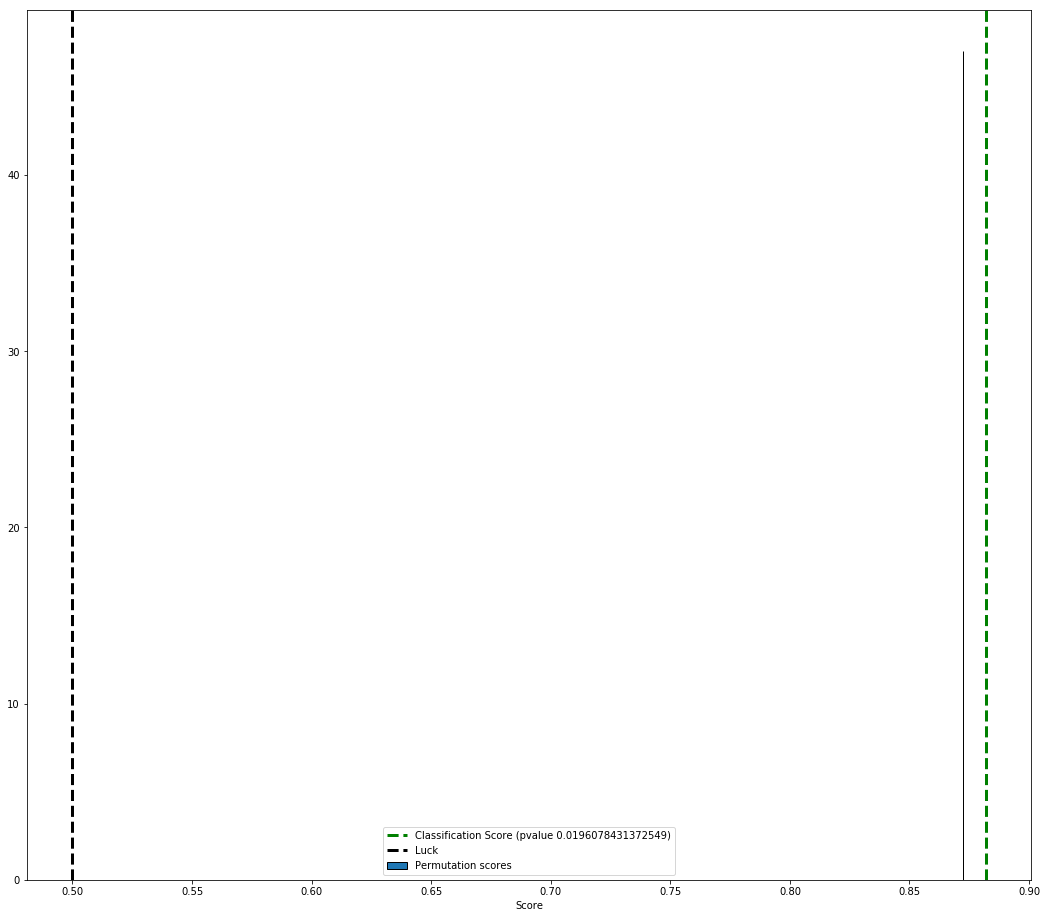

In [317]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score


lg = LGBMClassifier(boosting_type='gbdt', objective='binary',
                       num_class=1, metric="binary_logloss",
                       is_enable_sparse='true',tree_learner='data',min_data_in_leaf=100,max_depth=14,
                       learning_rate=0.06, n_estimators=1000, max_bin=512, 
                       min_split_gain=5, min_child_weight=5, min_child_samples=5, subsample=0.995, 
                       subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       reg_lambda=0, seed=0, nthread=-1, num_leaves=10, silent=True,)

lg.fit(X, Y)


# Some noisy data not correlated
random = np.random.RandomState(seed=0)
E = random.normal(size=(len(X), 2200))
n_classes = np.unique(Y).size

# Add noisy data to the informative features for make the task harder
X_2 = np.c_[X.as_matrix(), E]

#svm = SVC(kernel='linear')
cv = StratifiedKFold(2)

score, permutation_scores, pvalue = permutation_test_score(
    lg, X_2, Y, scoring="accuracy", cv=cv, n_permutations=50, n_jobs=1)

print("Classification score %s (pvalue : %s)" % (score, pvalue))

# #############################################################################
# View histogram of permutation scores
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
# BUG: vlines(..., linestyle='--') fails on older versions of matplotlib
# plt.vlines(score, ylim[0], ylim[1], linestyle='--',
#          color='g', linewidth=3, label='Classification Score'
#          ' (pvalue %s)' % pvalue)
# plt.vlines(1.0 / n_classes, ylim[0], ylim[1], linestyle='--',
#          color='k', linewidth=3, label='Luck')
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Luck')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

In [52]:
#y_pred = model.predict(X_test)

y_pred = model_full.predict(X_test)

drap = y_test.to_frame()

drap["pred"] = y_pred

drap["tail"] = drap["is_open"] - drap["pred"]

full_review_new.iloc[16973,:]

drap[drap["is_open"]==0]

drap["other"] = 1-drap["pred"]

new = drap[["other","pred"]].as_matrix()


NameError: name 'model_full' is not defined

In [185]:
#wodel = model

ValueError: Classification metrics can't handle a mix of binary and continuous targets

<IPython.core.display.Javascript object>


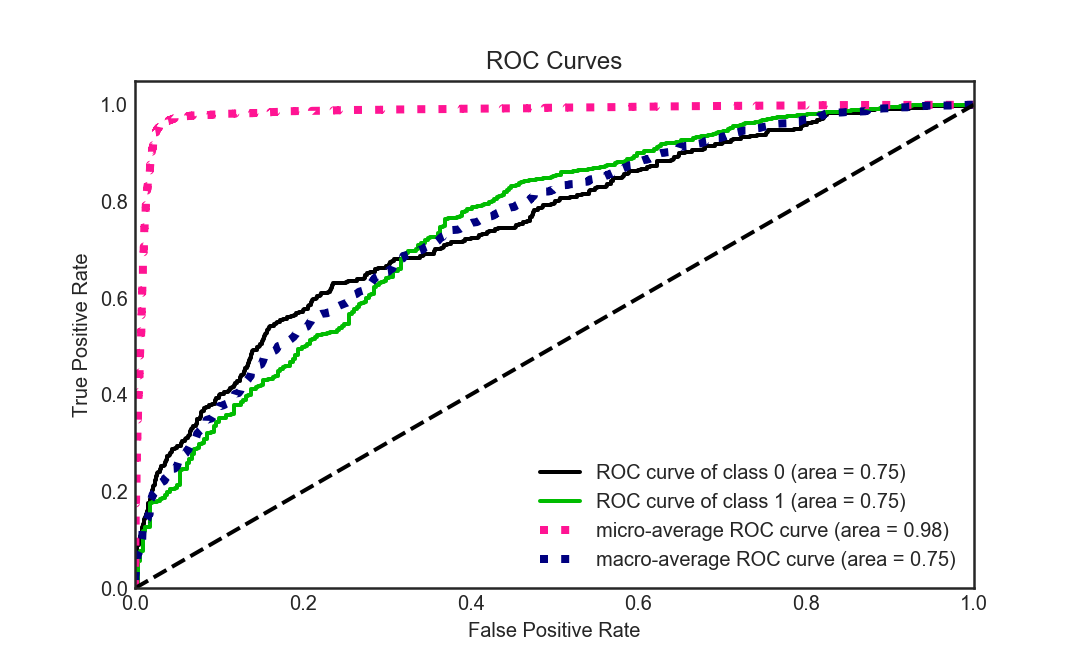

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


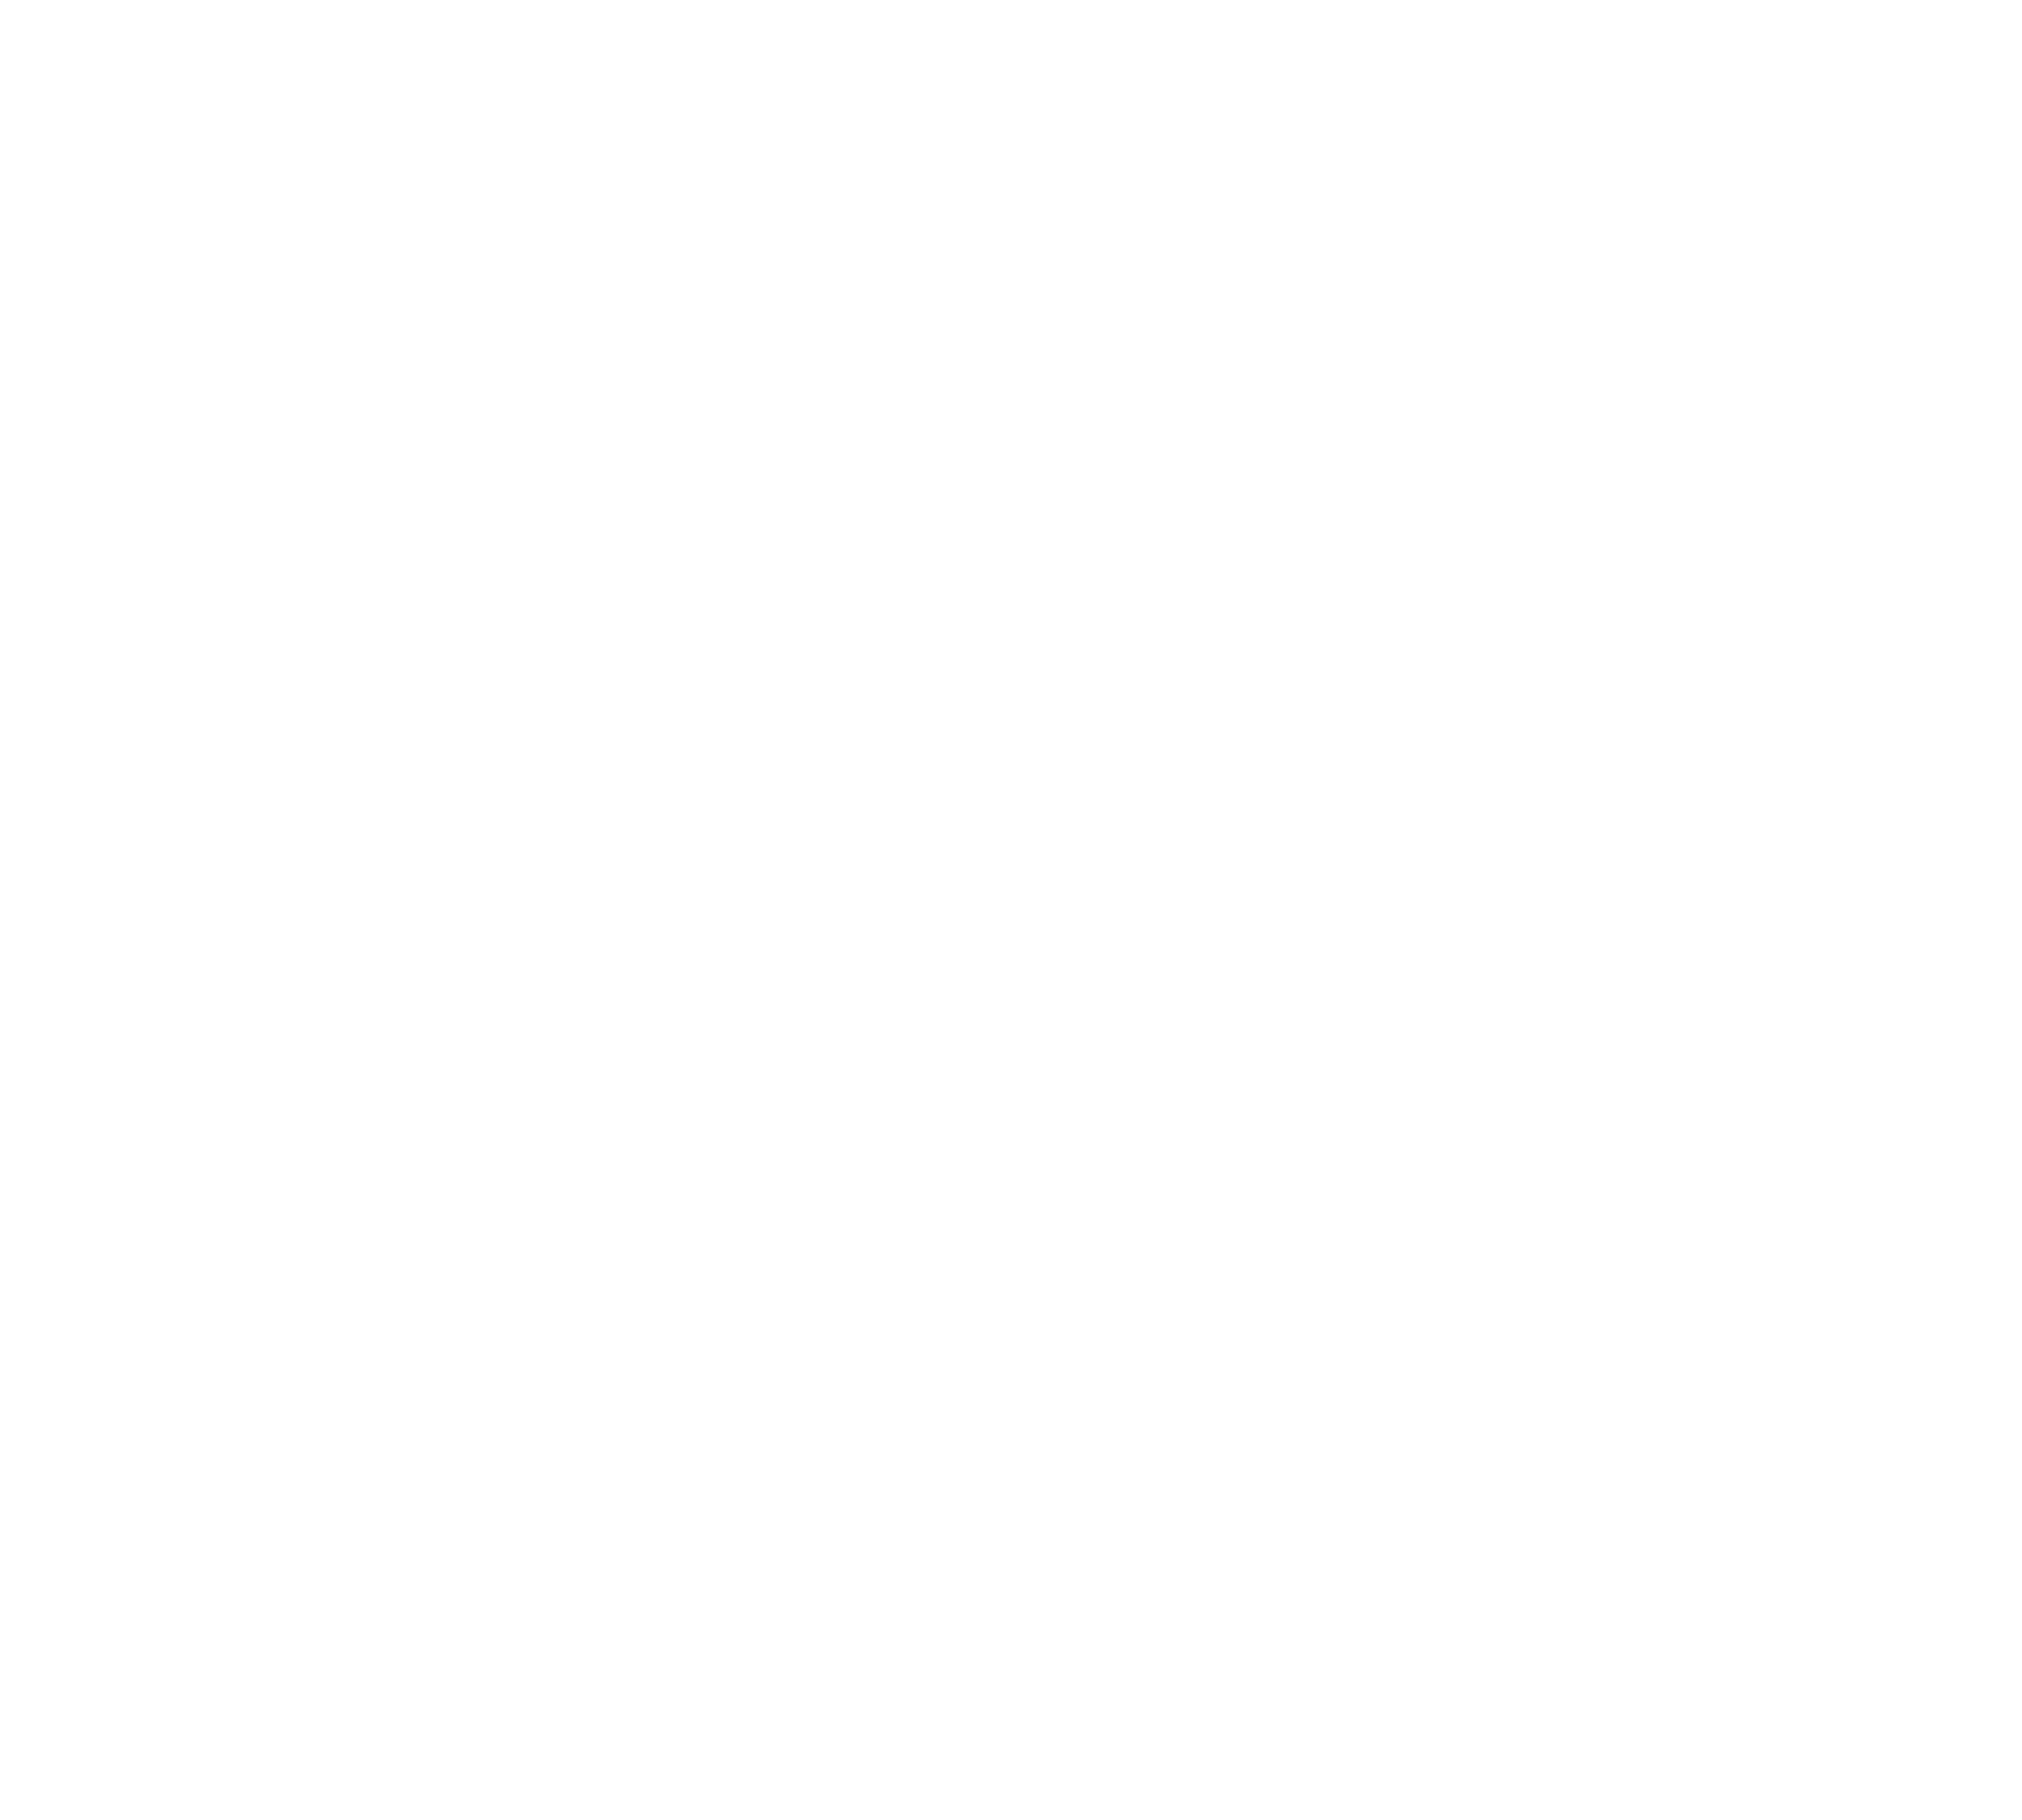

ValueError: Length of values does not match length of index

In [193]:
%matplotlib notebook
#y_pred_proba = model.predict_proba(X_test)
accuracy_score(y_test, y_pred)

import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_roc_curve(drap["is_open"], new)

plt.figure(figsize=(40, 36))


plt.show()

ga = pd.DataFrame()

ga["name"] = X.columns
ga["imp"] = model.feature_importance()
print(accuracy_score(y_test, y_pred.round(0)))
pd.set_option("display.max_rows",None)

In [139]:
ga = ga.sort_values("imp",ascending=False)

In [140]:
ga

name  imp
32                         first_sent_std  327
56                          oldest_review  299
74                     average_stars_mean  284
75                      average_stars_std  272
135                   first_min_last_sent  261
33                          last_sent_std  248
39                            useful_mean  246
31                         last_sent_mean  245
121                     Female Importance  230
5                              gender_std  223
134                        friends/review  223
110                      elite_count_mean  222
51                               latitude  215
30                        first_sent_mean  214
111                       elite_count_std  213
114                                Female  203
117                           Connoisseur  200
59                      stars_linear_coef  196
36                             useful_std  195
118                     Food Aestheticist  192
61                     restaurant_density  177
63                      zreview_count_all  177
0                              rating_std  177
26                     senti_polarity_min  176
25                     senti_polarity_std  173
64                   zreview_per_week_all  173
34                         first_sent_sum  168
46                               cool_std  160
38                             useful_sum  158
200        zreview_per_week_all_chain_avg  157
28                    senti_polarity_mean  156
41                              funny_std  156
29                     senti_polarity_max  151
116                           Low Network  151
35                          last_sent_sum  151
27                     senti_polarity_sum  146
49                              cool_mean  143
73                      average_stars_sum  142
44                             funny_mean  141
270         first_min_last_sent_chain_avg  140
23                  review_count_usr_mean  138
72                               fans_std  137
192               oldest_review_chain_avg  137
191            reviews_per_week_chain_avg  135
55                       reviews_per_week  134
112                        Male to Female  134
24                   review_count_usr_max  134
115                          High Network  133
2                              rating_sum  132
8                             gender_mean  130
199           zreview_count_all_chain_avg  123
168              first_sent_std_chain_avg  121
60                     reactions_per_week  121
80                   compliment_more_mean  117
14                       friend_count_max  115
113                                  Male  112
10                       friend_count_std  111
96                   compliment_plain_std  111
12                       friend_count_sum  107
187                    latitude_chain_avg  102
20                   review_count_usr_std  102
406                              lat_long  101
52                              longitude  101
246             elite_count_std_chain_avg   99
13                      friend_count_mean   99
71                              fans_mean   98
57                           std_of_stars   97
180                  funny_mean_chain_avg   96
141                  gender_std_chain_avg   95
105                 compliment_writer_std   94
175                 useful_mean_chain_avg   93
15                        photo_count_std   93
18                       photo_count_mean   92
83                compliment_profile_mean   92
120                           First Visit   92
162          senti_polarity_min_chain_avg   92
95                  compliment_plain_mean   91
201                   zstar_all_chain_avg   90
182                    cool_std_chain_avg   86
86                   compliment_cute_mean   86
167              last_sent_mean_chain_avg   86
91                    compliment_note_sum   82
22                   review_count_usr_sum   81
122              Average Customer Network   80
77                    compliment_hot_mean 

In [360]:
import shap
shap_values = shap.TreeExplainer(model_full).shap_values(X)

In [361]:
#### I am adone
print("ffdgd")

ffdgd


In [24]:
cat = pd.DataFrame(shap_values[0:,:-1], columns = list(X.columns)).sum().to_frame().sort_values(0,ascending=False)


In [25]:
cat["Direction"] = cat[0].apply(lambda x: "-" if x<0else "+")

In [26]:
shap = pd.DataFrame(shap_values[0:,:-1], columns = list(X.columns)).abs().sum().to_frame().sort_values(0,ascending=False)
shap.columns = ["Shap"]

In [27]:
shap["Shap Rank"] = shap['Shap'].rank(ascending=0)

In [28]:
shape = pd.merge(shap, cat["Direction"].to_frame(), right_index=True, left_index=True, how="left")

In [29]:
gainz = pd.read_excel("feats_inter_sans.xlsx")

In [30]:
shape2 = pd.merge(shape, gainz.set_index("Interaction")[["Gain","Gain Rank"]], left_index=True, right_index=True, how="left") 

In [33]:
shape2.iloc[:20,:] = shape2.iloc[:20,:].fillna(shape2.mean())

In [35]:
shape2 = shape2.dropna(axis=0)

In [36]:
shape2["Shap Rank"] = shape2['Shap'].rank(ascending=0).astype(int)
shape2["Gain Rank"] = shape2['Gain'].rank(ascending=0).astype(int)

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
shape2["Shap"] = shape2["Shap"]/shape2["Shap"].max()
shape2["Gain"] = shape2["Gain"]/shape2["Gain"].max()


/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [38]:
shape2["Shap"] = (shape2["Shap"]*100).astype(int)

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
shape2["Gain"] = shape2["Gain"].fillna(value=0)
shape2["Gain"] = (shape2["Gain"]*100).astype(int)

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [40]:
shape2.columns

Index(['Shap', 'Shap Rank', 'Direction', 'Gain', 'Gain Rank'], dtype='object')

In [41]:
#shape3 = pd.merge(shape2, ga.set_index("name"), left_index=True, right_index=True, how="left") 

In [44]:
from tsfresh.feature_selection.relevance import calculate_relevance_table

vat = calculate_relevance_table(X, Y)

shape3 = pd.merge(shape2, vat["relevant"].to_frame(), left_index=True, right_index=True, how="left") 

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [47]:
shape3 = shape2.rename(columns={"relevant":"Univariate Signif."})

In [50]:
shape3.to_csv("variable_importance.csv")

In [152]:
pd.set_option("display.max_rows",None)

In [154]:
shape2

Shap  Shap Rank Direction  Gain  Gain Rank
oldest_review                     100          1         +    54          3
oldest_review_chain_avg            86          2         +    97          2
useful_mean                        51          3         +    25          9
stars_linear_coef                  50          4         +    44          4
useful_sum                         49          5         -   100          1
gender_std                         43          6         -     9         51
restaurant_density                 42          7         +    24         11
Connoisseur                        39          8         +    21         14
rating_sum                         38          9         -     7         78
reviews_per_week                   37         10         -    16         21
latitude                           33         11         -    19         16
compliment_plain_mean              33         12         +    14         31
zreview_count_all                  33         13         -    23         12
average_stars_mean                 32         14         -    20         15
zstar_all_chain_std                32         15         -    17         20
elite_count_mean                   31         16         -    12         38
first_sent_mean                    31         17         -    14         32
Male to Female                     30         18         -    10         45
first_sent_std_chain_avg           29         19         +    18         17
zreview_per_week_all               29         20         -    39          5
elite_count_std                    29         21         +    15         24
zreview_count_all_chain_avg        25         22         +    25         10
rating_std                         25         23         -    14         34
reviews_per_week_chain_avg         25         24         +    11         39
first_sent_std                     24         25         +    15         26
last_sent_std                      23         26         -    15         23
funny_std                          22         27         +     8         71
useful_mean_chain_avg              22         28         +    18         18
last_sent_sum                      21         29         -     7         82
average_stars_std                  21         30         +    14         29
review_count_usr_mean              21         31         -     7         83
High Network                       20         32         -     9         50
Food Aestheticist                  20         33         +    14         33
friends/review                     20         34         -    13         35
Female                             20         35         +     9         52
latitude_chain_avg                 20         36         -     8         65
senti_polarity_mean                19         37         -     8         62
first_sent_sum                     19         38         -    30          8
zstar_all_chain_avg                19         39         +    15         27
zreview_per_week_all_chain_avg     19         40         -    30          6
last_sent_mean                     18         41         -     7         79
useful_std                         18         42         -     5         98
average_stars_std_chain_avg        17         43         -     6         95
first_min_last_sent_chain_avg      17         44         +     9         53
senti_polarity_std                 17         45         +    18         19
longitude                          17         46         +    12         37
cool_std                           17         47         -     9         59
elite_count_std_chain_avg          17         48         -    10         47
restaurant_similar_density         16         49         -     6         93
senti_polarity_min                 16         50         -    11         43
first_min_last_sent                16         51         -    15         22
elite_count_sum                    16         52         +     8         70
last_

In [153]:
shape2

Shap  Shap Rank Direction  Gain  Gain Rank
oldest_review                     100          1         +    54          3
oldest_review_chain_avg            86          2         +    97          2
useful_mean                        51          3         +    25          9
stars_linear_coef                  50          4         +    44          4
useful_sum                         49          5         -   100          1
gender_std                         43          6         -     9         51
restaurant_density                 42          7         +    24         11
Connoisseur                        39          8         +    21         14
rating_sum                         38          9         -     7         78
reviews_per_week                   37         10         -    16         21
latitude                           33         11         -    19         16
compliment_plain_mean              33         12         +    14         31
zreview_count_all                  33         13         -    23         12
average_stars_mean                 32         14         -    20         15
zstar_all_chain_std                32         15         -    17         20
elite_count_mean                   31         16         -    12         38
first_sent_mean                    31         17         -    14         32
Male to Female                     30         18         -    10         45
first_sent_std_chain_avg           29         19         +    18         17
zreview_per_week_all               29         20         -    39          5
elite_count_std                    29         21         +    15         24
zreview_count_all_chain_avg        25         22         +    25         10
rating_std                         25         23         -    14         34
reviews_per_week_chain_avg         25         24         +    11         39
first_sent_std                     24         25         +    15         26
last_sent_std                      23         26         -    15         23
funny_std                          22         27         +     8         71
useful_mean_chain_avg              22         28         +    18         18
last_sent_sum                      21         29         -     7         82
average_stars_std                  21         30         +    14         29
review_count_usr_mean              21         31         -     7         83
High Network                       20         32         -     9         50
Food Aestheticist                  20         33         +    14         33
friends/review                     20         34         -    13         35
Female                             20         35         +     9         52
latitude_chain_avg                 20         36         -     8         65
senti_polarity_mean                19         37         -     8         62
first_sent_sum                     19         38         -    30          8
zstar_all_chain_avg                19         39         +    15         27
zreview_per_week_all_chain_avg     19         40         -    30          6
last_sent_mean                     18         41         -     7         79
useful_std                         18         42         -     5         98
average_stars_std_chain_avg        17         43         -     6         95
first_min_last_sent_chain_avg      17         44         +     9         53
senti_polarity_std                 17         45         +    18         19
longitude                          17         46         +    12         37
cool_std                           17         47         -     9         59
elite_count_std_chain_avg          17         48         -    10         47
restaurant_similar_density         16         49         -     6         93
senti_polarity_min                 16         50         -    11         43
first_min_last_sent                16         51         -    15         22
elite_count_sum                    16         52         +     8         70
last_

In [117]:
#shape3["Imp Rank"] = shape3['imp'].rank(ascending=0).astype(int)

In [119]:
from tsfresh.feature_selection.relevance import calculate_relevance_table

vat = calculate_relevance_table(X, Y)

In [126]:
vat = calculate_relevance_table(X, Y)

feature  \
feature                                                                      
oldest_review_chain_avg                            oldest_review_chain_avg   
is_chain                                                          is_chain   
latitude_chain_std                                      latitude_chain_std   
Female Importance_chain_std                    Female Importance_chain_std   
Average Customer Network_chain_std      Average Customer Network_chain_std   
longitude_chain_std                                    longitude_chain_std   
Male to Female_chain_std                          Male to Female_chain_std   
Low Network_chain_std                                Low Network_chain_std   
friends/review_chain_std                          friends/review_chain_std   
first_sent_std_chain_std                          first_sent_std_chain_std   
compliment_profile_std_chain_std          compliment_profile_std_chain_std   
funny_std_chain_std                                    funny_std_chain_std   
compliment_profile_mean_chain_std        compliment_profile_mean_chain_std   
gender_std_chain_std                                  gender_std_chain_std   
cool_std_chain_std                                      cool_std_chain_std   
friend_count_mean_chain_std                    friend_count_mean_chain_std   
senti_polarity_std_chain_std                  senti_polarity_std_chain_std   
compliment_photos_mean_chain_std          compliment_photos_mean_chain_std   
photo_count_mean_chain_std                      photo_count_mean_chain_std   
zstar_all_chain_std                                    zstar_all_chain_std   
useful_std_chain_std                                  useful_std_chain_std   
average_stars_mean_chain_std                  average_stars_mean_chain_std   
first_sent_mean_chain_std                        first_sent_mean_chain_std   
review_count_usr_std_chain_std              review_count_usr_std_chain_std   
average_stars_std_chain_std                    average_stars_std_chain_std   
photo_count_std_chain_std                        photo_count_std_chain_std   
compliment_photos_std_chain_std            compliment_photos_std_chain_std   
compliment_list_mean_chain_std              compliment_list_mean_chain_std   
last_sent_std_chain_std                            last_sent_std_chain_std   
stars_mean_chain_std                                  stars_mean_chain_std   
rating_mean_chain_std                                rating_mean_chain_std   
last_sent_mean_chain_std                          last_sent_mean_chain_std   
First Visit_chain_std                                First Visit_chain_std   
Food Aestheticist_chain_std                    Food Aestheticist_chain_std   
compliment_hot_mean_chain_std                compliment_hot_mean_chain_std   
senti_polarity_mean_chain_std                senti_polarity_mean_chain_std   
funny_amax_chain_std                                  funny_amax_chain_std   
compliment_more_std_chain_std                compliment_more_std_chain_std   
compliment_cute_mean_chain_std              compliment_cute_mean_chain_std   
funny_mean_chain_std                                  funny_mean_chain_std   
compliment_list_std_chain_std                compliment_list_std_chain_std   
friend_count_std_chain_std                      friend_count_std_chain_std   
gender_mean_chain_std                                gender_mean_chain_std   
compliment_more_mean_chain_std              compliment_more_mean_chain_std   
compliment_profile_sum_chain_std          compliment_profile_sum_chain_std   
compliment_hot_std_chain_std                  compliment_hot_std_chain_std   
compliment_cool_mean_chain_std              compliment_cool_mean_chain_std   
compliment_funny_mean_chain_std            compliment_funny_mean_chain_std   
Female_chain_std                                          Female_chain_std   
High Network_chain_std                              High Network_chain_std   
compliment_

In [113]:
shape2

Shap  Shap Rank Direction  Gain  Gain Rank
oldest_review                     100          1         +    54          3
oldest_review_chain_avg            86          2         +    97          2
useful_mean                        51          3         +    25          9
stars_linear_coef                  50          4         +    44          4
useful_sum                         49          5         -   100          1
gender_std                         43          6         -     9         50
restaurant_density                 42          7         +    24         11
Connoisseur                        39          8         +    21         14
rating_sum                         38          9         -     7         77
reviews_per_week                   37         10         -    16         21
latitude                           33         11         -    19         16
zreview_count_all                  33         12         -    23         12
average_stars_mean                 32         13         -    20         15
zstar_all_chain_std                32         14         -    17         20
elite_count_mean                   31         15         -    12         37
first_sent_mean                    31         16         -    14         31
Male to Female                     30         17         -    10         44
first_sent_std_chain_avg           29         18         +    18         17
zreview_per_week_all               29         19         -    39          5
elite_count_std                    29         20         +    15         24
zreview_count_all_chain_avg        25         21         +    25         10
rating_std                         25         22         -    14         33
reviews_per_week_chain_avg         25         23         +    11         38
first_sent_std                     24         24         +    15         26
last_sent_std                      23         25         -    15         23
funny_std                          22         26         +     8         70
useful_mean_chain_avg              22         27         +    18         18
last_sent_sum                      21         28         -     7         81
average_stars_std                  21         29         +    14         29
review_count_usr_mean              21         30         -     7         82
High Network                       20         31         -     9         49
Food Aestheticist                  20         32         +    14         32
friends/review                     20         33         -    13         34
Female                             20         34         +     9         51
latitude_chain_avg                 20         35         -     8         64
senti_polarity_mean                19         36         -     8         61
first_sent_sum                     19         37         -    30          8
zstar_all_chain_avg                19         38         +    15         27
zreview_per_week_all_chain_avg     19         39         -    30          6
last_sent_mean                     18         40         -     7         78
useful_std                         18         41         -     5         97
average_stars_std_chain_avg        17         42         -     6         94
first_min_last_sent_chain_avg      17         43         +     9         52
senti_polarity_std                 17         44         +    18         19
longitude                          17         45         +    12         36
cool_std                           17         46         -     9         58
elite_count_std_chain_avg          17         47         -    10         46
restaurant_similar_density         16         48         -     6         92
senti_polarity_min                 16         49         -    11         42
first_min_last_sent                16         50         -    15         22
elite_count_sum                    16         51         +     8         69
last_sent_mean_chain_avg           16         52         -     7         80
cool_

In [14]:
shape3

NameError: name 'shape3' is not defined

In [28]:
shap = pd.DataFrame(shap_values[0:,:-1], columns = list(X.columns)).abs().sum().to_frame().sort_values(0,ascending=False)


0
oldest_review                         10857.549129
oldest_review_chain_avg                9427.620338
useful_mean                            5551.318048
stars_linear_coef                      5429.562803
useful_sum                             5389.089699
gender_std                             4761.522918
restaurant_density                     4562.308184
Connoisseur                            4330.761405
rating_sum                             4229.343310
reviews_per_week                       4049.851485
latitude                               3652.926755
compliment_plain_mean                  3633.171469
zreview_count_all                      3614.698967
average_stars_mean                     3543.036126
zstar_all_chain_std                    3494.586635
elite_count_mean                       3462.528845
first_sent_mean                        3403.862081
Male to Female                         3322.669813
first_sent_std_chain_avg               3233.481576
zreview_per_week_all                   3222.254830
elite_count_std                        3191.009706
compliment_more_mean                   2825.727827
zreview_count_all_chain_avg            2817.500884
rating_std                             2773.276921
reviews_per_week_chain_avg             2747.474297
first_sent_std                         2663.498614
last_sent_std                          2604.101943
fans_std                               2476.905742
funny_std                              2418.917435
useful_mean_chain_avg                  2406.109241
last_sent_sum                          2351.729934
average_stars_std                      2335.291104
review_count_usr_mean                  2305.839132
High Network                           2238.115340
Food Aestheticist                      2222.190365
friends/review                         2219.899389
Female                                 2198.597273
latitude_chain_avg                     2187.508888
senti_polarity_mean                    2102.813695
first_sent_sum                         2077.014307
zstar_all_chain_avg                    2076.150498
zreview_per_week_all_chain_avg         2071.691913
cool_std_chain_avg                     2041.559331
last_sent_mean                         2032.141687
cool_sum_chain_std                     1998.435895
useful_std                             1972.983615
std_of_stars                           1971.469032
average_stars_std_chain_avg            1948.800760
first_min_last_sent_chain_avg          1912.922775
senti_polarity_std                     1912.211850
compliment_writer_std                  1907.345471
longitude                              1900.827232
cool_std                               1862.917704
elite_count_std_chain_avg              1853.306487
restaurant_similar_density             1829.069525
senti_polarity_min                     1827.048264
first_min_last_sent                    1797.428403
compliment_hot_mean                    1780.091737
elite_count_sum                        1763.122962
last_sent_mean_chain_avg               1751.887298
Bike Parking                           1730.827902
photo_count_mean                       1680.963421
cool_mean                              1678.360141
senti_polarity_min_chain_avg           1657.526769
compliment_cool_mean_chain_std         1649.190884
senti_polarity_sum                     1642.615134
Connoisseur_chain_avg                  1613.778996
review_count_usr_mean_chain_avg        1578.680914
zstar_all                              1572.909345
rating_std_chain_avg                   1569.984972
cool_std_chain_std                     1545.666877
cool_amax                              1513.591224
Female Importance                      1498.514595
review_count_usr_sum                   1484.679737
senti_polarity_max_chain_avg           1469.285408
compliment_list_mean                   1437.964474
friend_count_sum                       1427.295488
compliment_profile_std                 1423.316223
Low Network         

In [149]:
X["latitude"].head()

5323    43.707978
5327    43.653221
5326    41.412350
5325    45.517876
5324    40.543238
Name: latitude, dtype: float64

In [ ]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,10)

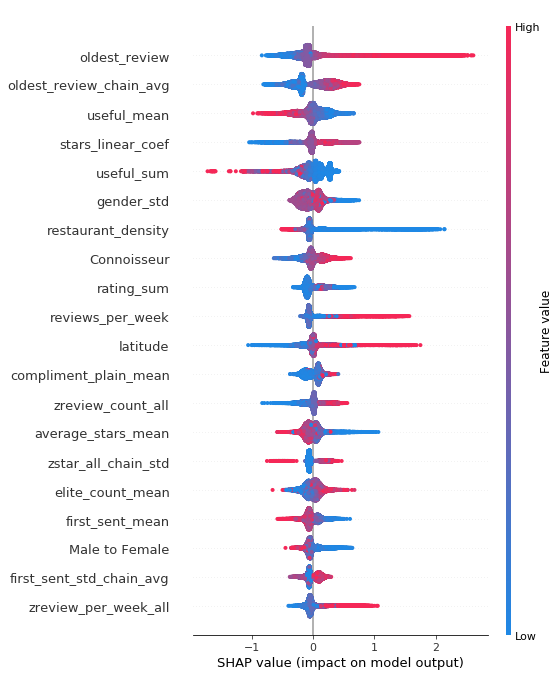

In [31]:
shap.summary_plot(shap_values, X)

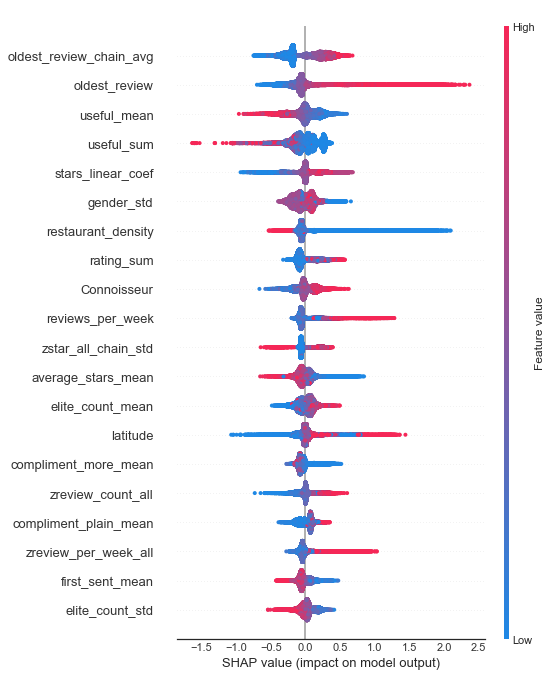

In [142]:
shap.summary_plot(shap_values, X)

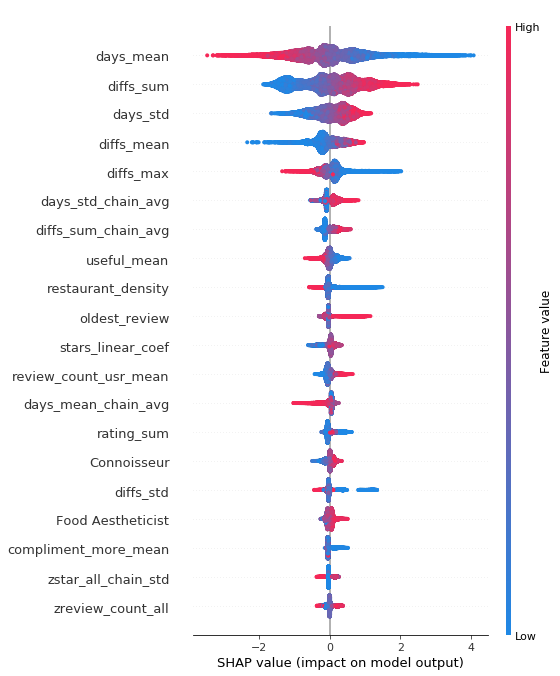

In [13]:
shap.summary_plot(shap_values, X)

In [ ]:
shap.dependence_plot(name, shap_values, X, display_features=X)

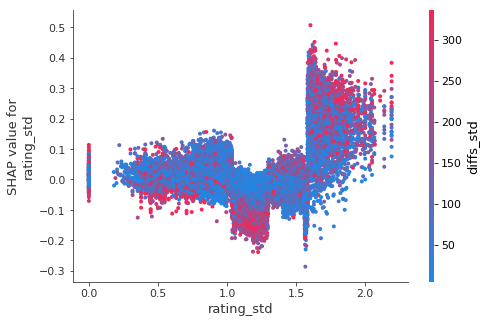

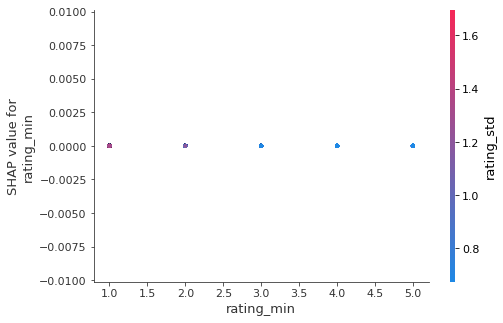

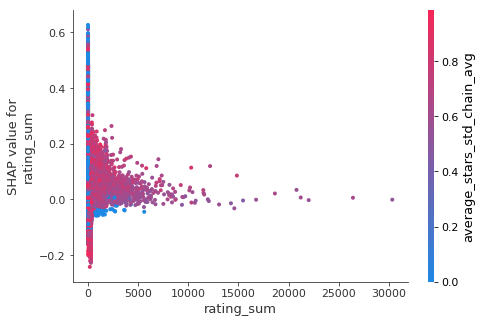

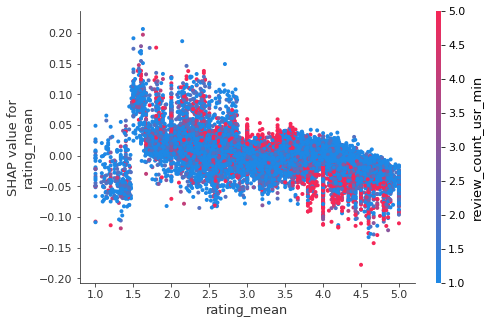

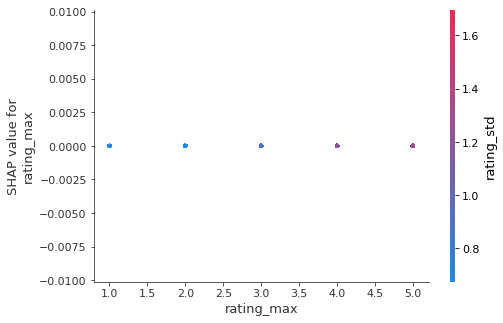

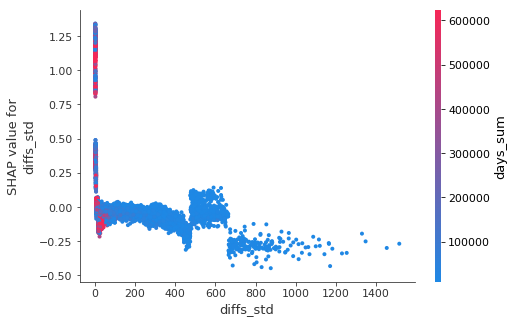

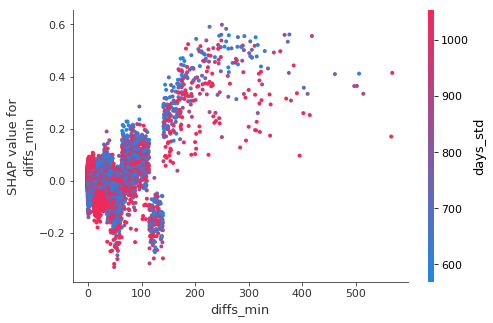

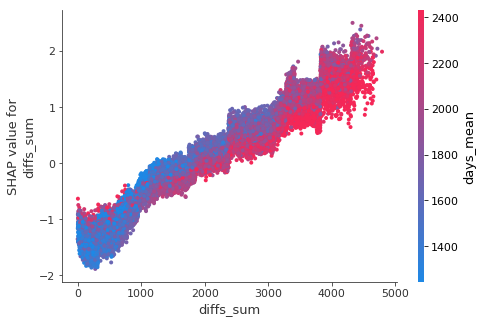

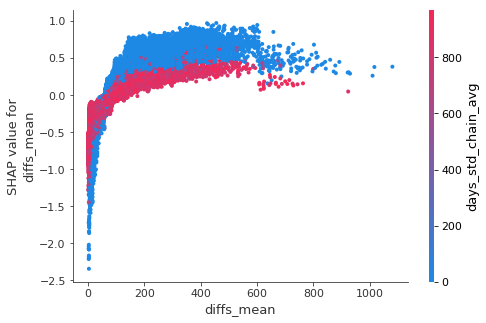

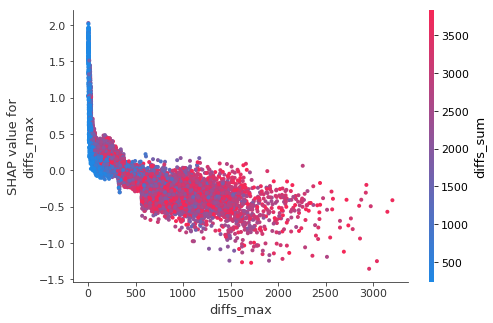

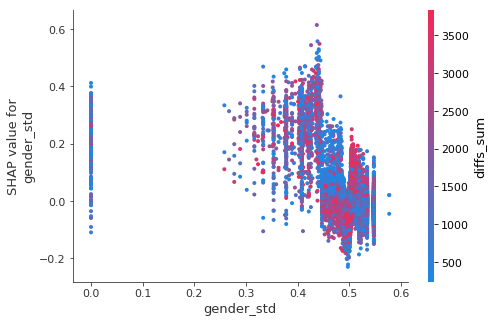

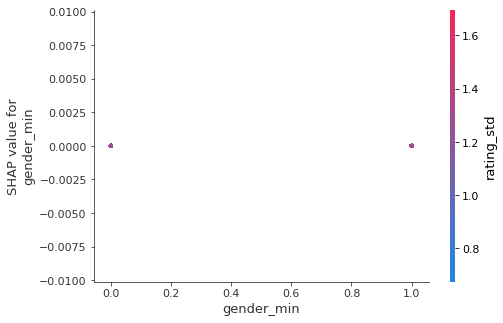

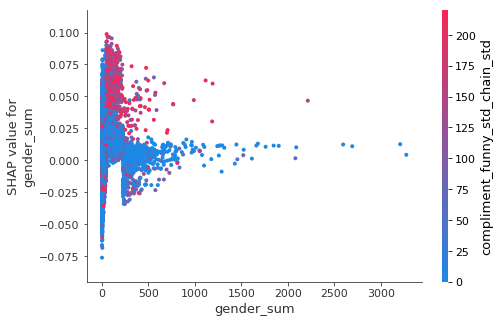

In [31]:
for name in X_train.iloc[:,:13].columns:
    shap.dependence_plot(name, shap_values, X, display_features=X)



In [274]:
import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=7, n_estimators=1000, learning_rate=0.05).fit(X_train,y_train)


In [275]:
import xgbfir

xgbfir.saveXgbFI(gbm,feature_names=list(X.columns), OutputXlsxFile='feats_inter_sans.xlsx') 

In [85]:
pd.DataFrame(shap_values[0:,:-1], columns = list(X.columns)).sum().to_frame().sort_values(0,ascending=False)



0
days_std_chain_avg   1611.637224
days_std             1339.377914
diffs_max            1152.594965
oldest_review        1023.657339
diffs_sum             496.071660
useful_mean           171.015290
restaurant_density     66.274961
diffs_mean           -456.770338
days_mean            -742.349588
diffs_sum_chain_avg -1610.956385

In [61]:
### You had to take abs volaue so wel done. 

abs_shap = pd.DataFrame(shap_values[0:,:-1], columns = list(X.columns)).abs().sum().to_frame().sort_values(0,ascending=False)

lit = []
for r in list(abs_shap.index.values[:10]):
    t = X.columns.get_loc(r)
    lit.append(t)
    print(t)

lit

X.head()

shap.force_plot(shap_values[:100,np.r_[10,30]], X.iloc[:100,np.r_[10,30]], link="logit")

In [362]:
shap.force_plot(shap_values[0,:], X_test.iloc[0,:], link="logit")

In [83]:
shap.force_plot(shap_values[100,:], X.iloc[100,:], link="logit")

In [ ]:
shap.force_plot(shap_values, X)

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/shap/plots.py:592: UserWarning: shap.force_plot is slow many thousands of rows, try subsampling your data.
  warnings.warn("shap.force_plot is slow many thousands of rows, try subsampling your data.")


In [ ]:
lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train)],eval_metric='AUC',
        early_stopping_rounds=5)

y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)
accuracy_score(y_test, y_pred)



import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

ga = pd.DataFrame()

ga["name"] = X.columns

ga["imp"] = lgbm.feature_importances_
print(accuracy_score(y_test, y_pred))
pd.set_option("display.max_rows",None)

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:104: UserWarning: Found `early_stopping` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's auc: 0.754216
Training until validation scores don't improve for 50 rounds.
[2]	training's auc: 0.774986
[3]	training's auc: 0.780887
[4]	training's auc: 0.791206
[5]	training's auc: 0.803704
[6]	training's auc: 0.806146
[7]	training's auc: 0.808055
[8]	training's auc: 0.810488
[9]	training's auc: 0.812801
[10]	training's auc: 0.817025
[11]	training's auc: 0.818193
[12]	training's auc: 0.819614
[13]	training's auc: 0.824379
[14]	training's auc: 0.825665
[15]	training's auc: 0.828518
[16]	training's auc: 0.83052
[17]	training's auc: 0.833184
[18]	training's auc: 0.835004
[19]	training's auc: 0.837711
[20]	training's auc: 0.839446
[21]	training's auc: 0.841693
[22]	training's auc: 0.845827
[23]	training's auc: 0.848617
[24]	training's auc: 0.851357
[25]	training's auc: 0.854738
[26]	training's auc: 0.856883
[27]	training's auc: 0.858518
[28]	training's auc: 0.860441
[29]	training's auc: 0.862856
[30]	training's auc: 0.8649
[31]	training's auc: 0.866397
[32]	training's auc:

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


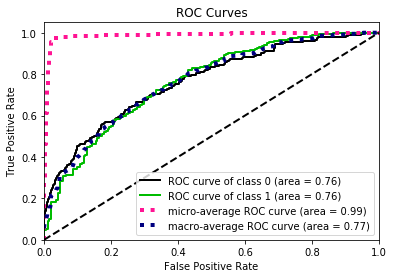

0.9705558613098514


In [359]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

train = 0.67
range_size = int(len(X)*train)
X_train, X_test, y_train, y_test = X.iloc[:range_size,:], X.iloc[range_size:,:], Y.iloc[:range_size], Y.iloc[range_size:]

# This is what I expect a human to get 
Y.sum()/(Y.count())

from lightgbm import LGBMClassifier


lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary',
                       num_class=1,early_stopping = 50,
                       is_enable_sparse='true',tree_learner='data',num_leaves=31,num_iteration=10000,min_data_in_leaf=100,max_depth=14,
                       learning_rate=0.1, n_estimators=1000, max_bin=255, subsample_for_bin=500, 
                       min_split_gain=5, min_child_weight=5, min_child_samples=5, subsample=0.995, 
                       subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       reg_lambda=0, seed=0, nthread=-1, silent=True,)

lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train)],eval_metric='AUC',
        early_stopping_rounds=5)

y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)
accuracy_score(y_test, y_pred)



import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

ga = pd.DataFrame()

ga["name"] = X.columns

ga["imp"] = lgbm.feature_importances_
print(accuracy_score(y_test, y_pred))
pd.set_option("display.max_rows",None)

In [349]:
accuracy_score(y_test, y_pred)

0.9297031354236157

In [360]:
ga.sort_values("imp",ascending=False)

name  imp
118                             days_mean  252
119                              days_std  142
7                               diffs_sum  107
8                              diffs_mean   74
44                            useful_mean   42
64                      stars_linear_coef   41
125                           Connoisseur   35
261                   days_mean_chain_avg   34
262                    days_std_chain_avg   30
5                               diffs_std   29
28                  review_count_usr_mean   25
9                               diffs_max   25
151                   diffs_sum_chain_avg   22
66                     restaurant_density   22
69                   zreview_per_week_all   21
143                   first_min_last_sent   20
56                               latitude   19
10                             gender_std   19
2                              rating_sum   19
29                   review_count_usr_max   18
200                    latitude_chain_avg   18
61                          oldest_review   18
0                              rating_std   18
68                      zreview_count_all   17
205               oldest_review_chain_avg   17
26                   review_count_usr_min   16
142                        friends/review   15
120                        Male to Female   15
212           zreview_count_all_chain_avg   15
32                     senti_polarity_sum   14
268                 Connoisseur_chain_avg   14
79                     average_stars_mean   13
60                       reviews_per_week   12
269           Food Aestheticist_chain_avg   12
213        zreview_per_week_all_chain_avg   12
170        review_count_usr_min_chain_avg   11
38                          last_sent_std   11
130              Average Customer Network   11
57                              longitude   11
37                         first_sent_std   11
70                              zstar_all   10
43                             useful_sum   10
126                     Food Aestheticist   10
175          senti_polarity_min_chain_avg    9
124                           Low Network    8
208           stars_linear_coef_chain_avg    8
265                      Female_chain_avg    7
133                     Convenience Level    7
355           zreview_count_all_chain_std    7
145                  rating_min_chain_avg    7
80                      average_stars_std    7
39                         first_sent_sum    7
241         compliment_note_std_chain_avg    6
384         compliment_note_std_chain_std    6
181              first_sent_std_chain_avg    6
123                          High Network    6
13                            gender_mean    6
30                     senti_polarity_std    6
188                 useful_mean_chain_avg    5
67             restaurant_similar_density    5
25                   review_count_usr_std    5
117                              days_sum    5
18                      friend_count_mean    5
31                     senti_polarity_min    5
204            reviews_per_week_chain_avg    4
173        review_count_usr_max_chain_avg    4
144                  rating_std_chain_avg    4
275         Number of Reviewers_chain_avg    4
152                  diffs_mean_chain_avg    4
286         first_min_last_sent_chain_avg    4
162           friend_count_mean_chain_avg    4
96                    compliment_note_sum    4
128                           First Visit    4
146                  rating_sum_chain_avg    4
40                          last_sent_sum    4
319          senti_polarity_sum_chain_std    4
178          senti_polarity_max_chain_avg    4
115                      elite_count_mean    4
406              Male to Female_chain_std    4
150                   diffs_min_chain_avg    3
141                      review_count_loc    3
194                  funny_amax_chain_avg    3
333                   funny_std_chain_std    3
6                               diffs_min    3
27                   review_count_usr_sum 

In [368]:
shap_values = shap.TreeExplainer(model).shap_values(X)

Exception: Model type not yet supported by TreeExplainer: <class 'catboost.core.CatBoostClassifier'>

In [168]:
import shap

# load JS visualization code to notebook
shap.initjs() 
# visualize the first prediction's explaination
shap.force_plot(shap_values[1,:], X.iloc[1,:])

In [348]:
ga.sort_values("imp",ascending=False)

name  imp
118                             days_mean  220
119                              days_std  133
7                               diffs_sum   87
8                              diffs_mean   62
125                           Connoisseur   53
261                   days_mean_chain_avg   47
44                            useful_mean   47
64                      stars_linear_coef   41
9                               diffs_max   31
262                    days_std_chain_avg   29
151                   diffs_sum_chain_avg   24
5                               diffs_std   23
126                     Food Aestheticist   22
26                   review_count_usr_min   20
32                     senti_polarity_sum   20
68                      zreview_count_all   19
0                              rating_std   19
61                          oldest_review   18
268                 Connoisseur_chain_avg   16
66                     restaurant_density   16
143                   first_min_last_sent   15
208           stars_linear_coef_chain_avg   15
56                               latitude   14
39                         first_sent_sum   14
269           Food Aestheticist_chain_avg   13
79                     average_stars_mean   12
38                          last_sent_std   12
70                              zstar_all   12
355           zreview_count_all_chain_std   11
43                             useful_sum   11
92                    compliment_cute_std   10
170        review_count_usr_min_chain_avg   10
78                      average_stars_sum   10
69                   zreview_per_week_all   10
2                              rating_sum   10
35                        first_sent_mean   10
293                   diffs_min_chain_std   10
28                  review_count_usr_mean    9
152                  diffs_mean_chain_avg    9
286         first_min_last_sent_chain_avg    9
29                   review_count_usr_max    9
133                     Convenience Level    8
188                 useful_mean_chain_avg    8
117                              days_sum    8
33                    senti_polarity_mean    7
124                           Low Network    7
103                  compliment_cool_mean    6
206                std_of_stars_chain_avg    6
199                   cool_amax_chain_avg    6
200                    latitude_chain_avg    6
201                   longitude_chain_avg    6
176          senti_polarity_sum_chain_avg    6
406              Male to Female_chain_std    6
212           zreview_count_all_chain_avg    6
57                              longitude    6
175          senti_polarity_min_chain_avg    6
425                Bike Parking_chain_std    6
173        review_count_usr_max_chain_avg    6
6                               diffs_min    6
37                         first_sent_std    6
333                   funny_std_chain_std    5
205               oldest_review_chain_avg    5
30                     senti_polarity_std    4
145                  rating_min_chain_avg    4
241         compliment_note_std_chain_avg    4
214                   zstar_all_chain_avg    4
213        zreview_per_week_all_chain_avg    4
149                   diffs_std_chain_avg    4
128                           First Visit    4
178          senti_polarity_max_chain_avg    4
338                    cool_std_chain_std    4
123                          High Network    4
169        review_count_usr_std_chain_avg    4
189                 useful_amax_chain_avg    4
60                       reviews_per_week    4
257             elite_count_sum_chain_avg    4
95                    compliment_list_std    3
259             elite_count_std_chain_avg    3
121                                  Male    3
181              first_sent_std_chain_avg    3
144                  rating_std_chain_avg    3
404                   days_mean_chain_std    3
55                              cool_amax    3
80                      average_stars_std    3
27                   review_count_usr_sum 

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:104: UserWarning: Found `early_stopping` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's auc: 0.888298
Training until validation scores don't improve for 50 rounds.
[2]	training's auc: 0.898451
[3]	training's auc: 0.907781
[4]	training's auc: 0.912264
[5]	training's auc: 0.91412
[6]	training's auc: 0.91515
[7]	training's auc: 0.917894
[8]	training's auc: 0.919701
[9]	training's auc: 0.920493
[10]	training's auc: 0.922876
[11]	training's auc: 0.923903
[12]	training's auc: 0.925697
[13]	training's auc: 0.926121
[14]	training's auc: 0.927413
[15]	training's auc: 0.928462
[16]	training's auc: 0.929499
[17]	training's auc: 0.930444
[18]	training's auc: 0.93134
[19]	training's auc: 0.931998
[20]	training's auc: 0.932615
[21]	training's auc: 0.933894
[22]	training's auc: 0.934693
[23]	training's auc: 0.935925
[24]	training's auc: 0.936601
[25]	training's auc: 0.93736
[26]	training's auc: 0.93857
[27]	training's auc: 0.93935
[28]	training's auc: 0.940207
[29]	training's auc: 0.940998
[30]	training's auc: 0.94152
[31]	training's auc: 0.942378
[32]	training's auc: 0.9

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


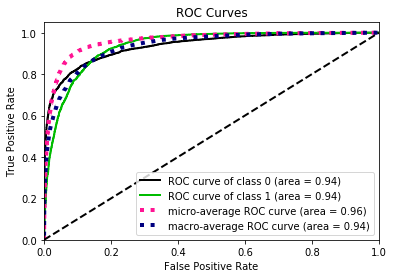

0.9052926606700561


In [200]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

# This is what I expect a human to get 
Y.sum()/(Y.count())

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary',
                       num_class=1,early_stopping = 50,
                       is_enable_sparse='true',tree_learner='data',num_leaves=31,num_iteration=10000,min_data_in_leaf=100,max_depth=14,
                       learning_rate=0.1, n_estimators=1000, max_bin=255, subsample_for_bin=500, 
                       min_split_gain=5, min_child_weight=5, min_child_samples=5, subsample=0.995, 
                       subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       reg_lambda=0, seed=0, nthread=-1, silent=True,)

lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train)],eval_metric='AUC',
        early_stopping_rounds=5)

y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)
accuracy_score(y_test, y_pred)



import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

ga = pd.DataFrame()

ga["name"] = X.columns

ga["imp"] = lgbm.feature_importances_
print(accuracy_score(y_test, y_pred))
pd.set_option("display.max_rows",None)

In [195]:
accuracy_score(y_test, y_pred)

0.8236866119150046

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:104: UserWarning: Found `early_stopping` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's auc: 0.882534
Training until validation scores don't improve for 50 rounds.
[2]	training's auc: 0.894094
[3]	training's auc: 0.898894
[4]	training's auc: 0.902307
[5]	training's auc: 0.903327
[6]	training's auc: 0.905976
[7]	training's auc: 0.908149
[8]	training's auc: 0.909991
[9]	training's auc: 0.911715
[10]	training's auc: 0.912686
[11]	training's auc: 0.914835
[12]	training's auc: 0.916285
[13]	training's auc: 0.917519
[14]	training's auc: 0.918646
[15]	training's auc: 0.919958
[16]	training's auc: 0.921151
[17]	training's auc: 0.922174
[18]	training's auc: 0.922863
[19]	training's auc: 0.923779
[20]	training's auc: 0.924697
[21]	training's auc: 0.925918
[22]	training's auc: 0.926888
[23]	training's auc: 0.927459
[24]	training's auc: 0.928288
[25]	training's auc: 0.929247
[26]	training's auc: 0.929884
[27]	training's auc: 0.931003
[28]	training's auc: 0.931879
[29]	training's auc: 0.932641
[30]	training's auc: 0.933569
[31]	training's auc: 0.934495
[32]	training's a

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


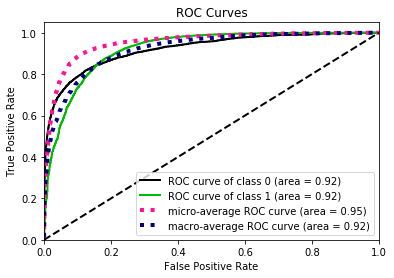

name  imp
113                             days_mean  264
114                              days_std  211
56                          oldest_review  138
21                   review_count_usr_min   52
39                            useful_mean   43
23                  review_count_usr_mean   40
59                      stars_linear_coef   34
112                              days_sum   34
74                     average_stars_mean   34
195               oldest_review_chain_avg   34
251                   days_mean_chain_avg   34
137                        friends/review   33
252                    days_std_chain_avg   31
128                     Convenience Level   28
27                     senti_polarity_sum   26
55                       reviews_per_week   25
35                          last_sent_sum   25
120                           Connoisseur   23
203        zreview_per_week_all_chain_avg   22
160        review_count_usr_min_chain_avg   21
121                     Food Aestheticist   20
63                      zreview_count_all   19
119                           Low Network   17
111                       elite_count_std   17
24                   review_count_usr_max   16
28                    senti_polarity_mean   16
32                         first_sent_std   15
49                              cool_mean   15
194            reviews_per_week_chain_avg   15
52                              longitude   14
118                          High Network   13
30                        first_sent_mean   12
61                     restaurant_density   12
22                   review_count_usr_sum   11
46                               cool_std   11
202           zreview_count_all_chain_avg   11
0                              rating_std   11
38                             useful_sum   10
99                    compliment_cool_std   10
64                   zreview_per_week_all   10
259           Food Aestheticist_chain_avg   10
20                   review_count_usr_std    9
34                         first_sent_sum    9
323                    cool_std_chain_std    8
7                              gender_sum    8
266           Convenience Level_chain_avg    8
263    Average Customer Network_chain_avg    8
256                High Network_chain_avg    8
8                             gender_mean    7
329                   longitude_chain_std    7
369         compliment_note_std_chain_std    7
41                              funny_std    7
51                               latitude    7
410                Bike Parking_chain_std    7
198           stars_linear_coef_chain_avg    6
2                              rating_sum    6
54                       count_categories    6
150            friend_count_min_chain_avg    6
338          restaurant_density_chain_std    6
29                     senti_polarity_max    5
116                                  Male    5
78                     compliment_hot_std    5
75                      average_stars_std    5
73                      average_stars_sum    5
36                             useful_std    5
177                  useful_sum_chain_avg    5
190                    latitude_chain_avg    5
187                    cool_sum_chain_avg    5
178                 useful_mean_chain_avg    5
43                              funny_sum    4
82                 compliment_profile_sum    4
262           Female Importance_chain_avg    4
260                     Patrons_chain_avg    4
140                  rating_min_chain_avg    4
391              Male to Female_chain_std    4
161        review_count_usr_sum_chain_avg    4
25                     senti_polarity_std    4
247             elite_count_sum_chain_avg    4
5                              gender_std    3
94                   compliment_plain_sum    3
258                 Connoisseur_chain_avg    3
339  restaurant_similar_density_chain_std    3
349           average_stars_sum_chain_std    3
65                              zstar_all    3
232        compliment_plain_sum_chain_avg 

In [190]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

# This is what I expect a human to get 
Y.sum()/(Y.count())

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary',
                       num_class=1,early_stopping = 50,
                       is_enable_sparse='true',tree_learner='data',num_leaves=31,num_iteration=10000,min_data_in_leaf=100,max_depth=14,
                       learning_rate=0.1, n_estimators=1000, max_bin=255, subsample_for_bin=500, 
                       min_split_gain=5, min_child_weight=5, min_child_samples=5, subsample=0.995, 
                       subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       reg_lambda=0, seed=0, nthread=-1, silent=True,)

lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train)],eval_metric='AUC',
        early_stopping_rounds=5)

y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)
accuracy_score(y_test, y_pred)



import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

ga = pd.DataFrame()

ga["name"] = X.columns

ga["imp"] = lgbm.feature_importances_

pd.set_option("display.max_rows",None)


ga.sort_values("imp",ascending=False)

In [201]:
ga.sort_values("imp",ascending=False)

name  imp
118                             days_mean  306
7                               diffs_sum  233
119                              days_std  150
8                              diffs_mean  102
28                  review_count_usr_mean   42
9                               diffs_max   35
133                     Convenience Level   33
26                   review_count_usr_min   31
142                        friends/review   30
262                    days_std_chain_avg   27
44                            useful_mean   26
64                      stars_linear_coef   26
32                     senti_polarity_sum   25
66                     restaurant_density   23
124                           Low Network   22
56                               latitude   22
51                               cool_std   22
125                           Connoisseur   21
5                               diffs_std   20
126                     Food Aestheticist   17
268                 Connoisseur_chain_avg   16
61                          oldest_review   16
57                              longitude   15
68                      zreview_count_all   15
151                   diffs_sum_chain_avg   15
139                          Bike Parking   14
35                        first_sent_mean   14
33                    senti_polarity_mean   14
0                              rating_std   14
170        review_count_usr_min_chain_avg   13
212           zreview_count_all_chain_avg   13
79                     average_stars_mean   13
261                   days_mean_chain_avg   13
123                          High Network   12
129                     Female Importance   12
143                   first_min_last_sent   11
117                              days_sum   11
297                  gender_std_chain_std   10
95                    compliment_list_std    9
10                             gender_std    9
163            friend_count_max_chain_avg    8
213        zreview_per_week_all_chain_avg    8
69                   zreview_per_week_all    8
41                             useful_std    8
208           stars_linear_coef_chain_avg    7
60                       reviews_per_week    7
269           Food Aestheticist_chain_avg    7
38                          last_sent_std    7
43                             useful_sum    6
204            reviews_per_week_chain_avg    5
160            friend_count_min_chain_avg    5
425                Bike Parking_chain_std    5
201                   longitude_chain_avg    5
413                     Patrons_chain_std    5
184               last_sent_sum_chain_avg    5
23                       photo_count_mean    5
30                     senti_polarity_std    5
265                      Female_chain_avg    5
270                     Patrons_chain_avg    5
153                   diffs_max_chain_avg    5
200                    latitude_chain_avg    5
266                High Network_chain_avg    5
145                  rating_min_chain_avg    5
3                             rating_mean    4
309             photo_count_sum_chain_std    4
85                   compliment_more_mean    4
2                              rating_sum    4
29                   review_count_usr_max    4
311             photo_count_max_chain_std    4
330                  useful_sum_chain_std    4
31                     senti_polarity_min    4
25                   review_count_usr_std    4
34                     senti_polarity_max    4
39                         first_sent_sum    4
205               oldest_review_chain_avg    4
20                        photo_count_std    4
18                      friend_count_mean    4
404                   days_mean_chain_std    4
241         compliment_note_std_chain_avg    3
209          reactions_per_week_chain_avg    3
152                  diffs_mean_chain_avg    3
176          senti_polarity_sum_chain_avg    3
146                  rating_sum_chain_avg    3
100                 compliment_plain_mean    3
98                    compliment_note_std 

In [180]:
ga.sort_values("imp",ascending=False)

name  imp
111                       elite_count_std  100
56                          oldest_review   99
39                            useful_mean   95
75                      average_stars_std   82
46                               cool_std   61
74                     average_stars_mean   41
30                        first_sent_mean   40
117                           Connoisseur   39
118                     Food Aestheticist   39
192               oldest_review_chain_avg   37
59                      stars_linear_coef   37
125                     Convenience Level   36
32                         first_sent_std   35
110                      elite_count_mean   34
63                      zreview_count_all   32
61                     restaurant_density   32
131                          Bike Parking   32
86                   compliment_cute_mean   31
25                     senti_polarity_std   29
80                   compliment_more_mean   29
52                              longitude   27
38                             useful_sum   25
33                          last_sent_std   25
51                               latitude   25
28                    senti_polarity_mean   24
20                   review_count_usr_std   23
18                       photo_count_mean   23
65                              zstar_all   22
191            reviews_per_week_chain_avg   22
64                   zreview_per_week_all   22
24                   review_count_usr_max   21
34                         first_sent_sum   20
115                          High Network   19
77                    compliment_hot_mean   19
54                       count_categories   18
83                compliment_profile_mean   18
55                       reviews_per_week   18
246             elite_count_std_chain_avg   17
19                        photo_count_max   17
0                              rating_std   17
15                        photo_count_std   17
89                   compliment_list_mean   15
17                        photo_count_sum   15
252                 Connoisseur_chain_avg   15
50                              cool_amax   15
332          restaurant_density_chain_std   15
135                   first_min_last_sent   13
175                 useful_mean_chain_avg   13
200        zreview_per_week_all_chain_avg   13
134                        friends/review   13
27                     senti_polarity_sum   13
8                             gender_mean   13
21                   review_count_usr_min   12
84                 compliment_profile_std   12
199           zreview_count_all_chain_avg   12
195           stars_linear_coef_chain_avg   12
85                    compliment_cute_sum   11
95                  compliment_plain_mean   11
401                Bike Parking_chain_std   10
187                    latitude_chain_avg   10
321                   cool_amax_chain_std   10
26                     senti_polarity_min   10
253           Food Aestheticist_chain_avg   10
112                        Male to Female    9
82                 compliment_profile_sum    9
71                              fans_mean    9
35                          last_sent_sum    9
391           Female Importance_chain_std    9
88                    compliment_list_sum    8
31                         last_sent_mean    8
270         first_min_last_sent_chain_avg    7
186                   cool_amax_chain_avg    7
11                       friend_count_min    7
198  restaurant_similar_density_chain_avg    7
171               last_sent_sum_chain_avg    7
12                       friend_count_sum    7
40                            useful_amax    7
120                           First Visit    6
109                       elite_count_sum    6
201                   zstar_all_chain_avg    6
41                              funny_std    6
36                             useful_std    6
269              friends/review_chain_avg    5
276                  gender_std_chain_std    5
260           Convenience Level_chain_avg 

In [ ]:
from catboost import Pool, CatBoostClassifier, cv, CatboostIpythonWidget
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]

model = CatBoostClassifier(iterations=1200, learning_rate=0.02, depth=7, loss_function='Logloss', eval_metric='AUC', random_seed=99, od_type='Iter', od_wait=100) 
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
accuracy_score(y_test, y_pred)

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


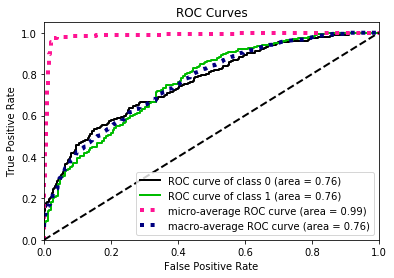

In [367]:
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_prob = model.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob)
plt.show()

In [71]:
import numpy as np
import statsmodels.formula.api as sm
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import tree
import scipy.interpolate
# No. dimensions of covariates
X = X.as_matrix()
def xi(x):
    return (1+1./(1.+np.exp(-20.*(x-1./3.))))
tau = np.multiply(xi(X[:,0]),xi(X[:,1]))


In [72]:
def tauxy(X_0,X_1):
    return np.multiply(xi(X_0),xi(X_1))
# Quick plot of tau as function of X_1, X_2 assuming continuous support
def plotFunc(func):
    X_0 = np.linspace(0, 1, 1000)
    X_1 = np.linspace(0, 1, 1000)
    X, Y = np.meshgrid(X_0, X_1)
    Z = func(X, Y)
    plt.style.use('seaborn-white')
    plt.imshow(Z, vmin=1., vmax=4., origin='lower',
              extent=[X_0.min(), X_0.max(), X_1.min(), X_1.max()],
             cmap='plasma')
    plt.colorbar()
    plt.xlabel(r'$X_0$')
    plt.ylabel(r'$X_1$')
plotFunc(tauxy)


In [75]:
# Draw a random subsample of size s.
# Choose s ints between 0 and n randomly
n = len(X)
s = int(len(X)/2)
subSampleMask = random.sample(range(0, n),s )
# Create set I
setIMask = random.sample(subSampleMask, np.int(np.ceil(s/2.)))
setI = [X[setIMask]]
# Create set J
setJMask = [i for i in subSampleMask if i not in setIMask]
setJ = [X[setJMask]]


In [80]:
setI[0]

array([[1.00087630e+00, 1.00000000e+00, 2.53000000e+02, ...,
        1.39172555e+02, 1.42675236e-01, 5.60532586e-01],
       [1.31412216e+00, 1.00000000e+00, 2.62000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.78885438e+00, 1.00000000e+00, 1.40000000e+01, ...,
        1.43814635e+01, 8.52511497e-01, 1.44160089e+00],
       ...,
       [1.07888421e+00, 1.00000000e+00, 1.86100000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.24078930e+00, 1.00000000e+00, 7.64000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.56477015e+00, 1.00000000e+00, 3.60000000e+02, ...,
        6.08742426e+01, 3.75796057e-01, 2.59047939e+00]])

406

In [88]:
d = X.shape[1]

clf = tree.DecisionTreeRegressor(criterion='mse')
clf = clf.fit(setJ[0], tau[setJMask])
tau_hat = clf.predict(pd.DataFrame(setI[0]).iloc[:,:d])
# Out of sample R^2:

clf.score(pd.DataFrame(setI[0]).iloc[:,:d],tau[setIMask])



0.9995475584221319

In [82]:
pd.DataFrame(setI[0])

KeyboardInterrupt: 

In [254]:
cols = ["useful_sum"
,"zreview_per_week_all_chain_avg"
,"zstar_all_chain_std"
,"oldest_review_chain_avg"
,"Number of Reviewers_chain_avg"
,"zreview_count_all"
,"stars_linear_coef_chain_avg"
,"elite_count_std_chain_avg"
,"Number of Reviewers"
,"zstar_all",
        "oldest_review"
,"rating_mean_chain_avg"
,"Connoisseur_chain_avg",
"Food Aestheticist_chain_avg"]

In [255]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.05, subsample=0.85, 
                        colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=100)
clf.fit(X[cols], Y)

XGBClassifier(base_score=0.5, colsample_bylevel=0.85, colsample_bytree=0.85,
       gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.85)

In [238]:
import xgboost as xgb

clf_2 = xgb.XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.05, subsample=0.85, 
                        colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=400)
clf_2.fit(X, Y)

XGBClassifier(base_score=0.5, colsample_bylevel=0.85, colsample_bytree=0.85,
       gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.85)

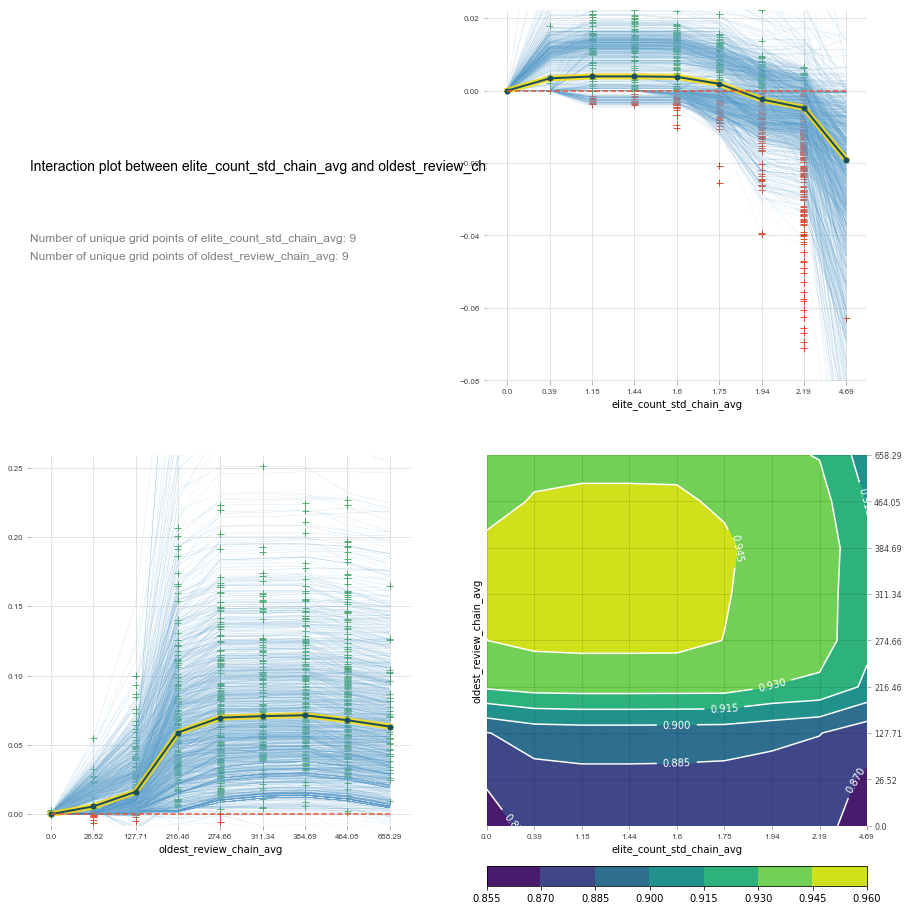

In [237]:
inter1 = pdp.pdp_interact(clf, X_test[cols].iloc[6000:,:], ['elite_count_std_chain_avg', 'oldest_review_chain_avg'])

plt.rcParams['figure.figsize'] = [18, 16]

pdp.pdp_interact_plot(inter1, ['elite_count_std_chain_avg', 'oldest_review_chain_avg'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)

In [218]:
X_test[cols].iloc[6000:,:]["useful_sum"]

20183      74.0
20182      44.0
20194      17.0
20181      33.0
20209      74.0
20211      15.0
20237       9.0
20236     684.0
20235       3.0
20234      13.0
20233      13.0
20232      22.0
20231      45.0
20230     227.0
20229       2.0
20228      61.0
20227      34.0
20226     118.0
20210      81.0
20225      45.0
20223     163.0
20222       6.0
20221      16.0
20220      10.0
20219      10.0
20218       9.0
20217      18.0
20216     223.0
20215       4.0
20214       0.0
20213      19.0
20212       4.0
20224     111.0
20238      26.0
20180     407.0
20178     408.0
20147      47.0
20146       6.0
20145      76.0
20144      30.0
20143     237.0
20142      38.0
20141      40.0
20140     132.0
20139     516.0
20138      12.0
20137      28.0
20136      14.0
20148      46.0
20135      54.0
20133      14.0
20132     197.0
20131     226.0
20130       5.0
20129      40.0
20128      15.0
20127      12.0
20126       0.0
20125      22.0
20124      37.0
20123       7.0
20122      21.0
20134   

In [224]:
X_test = X_test.reset_index(drop=True)

In [226]:
inter1

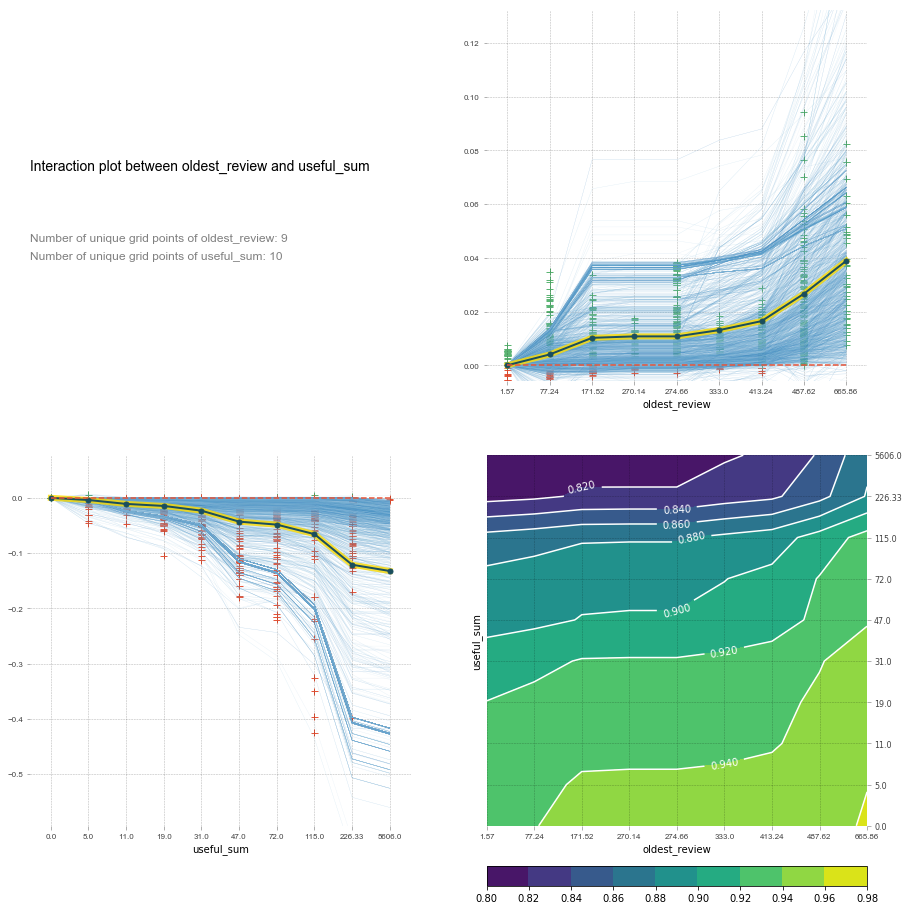

In [243]:
inter1 = pdp.pdp_interact(clf, X_test[cols].iloc[6000:,:], ['oldest_review', 'useful_sum'])

plt.rcParams['figure.figsize'] = [18, 16]

pdp.pdp_interact_plot(inter1, ['oldest_review', 'useful_sum'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)

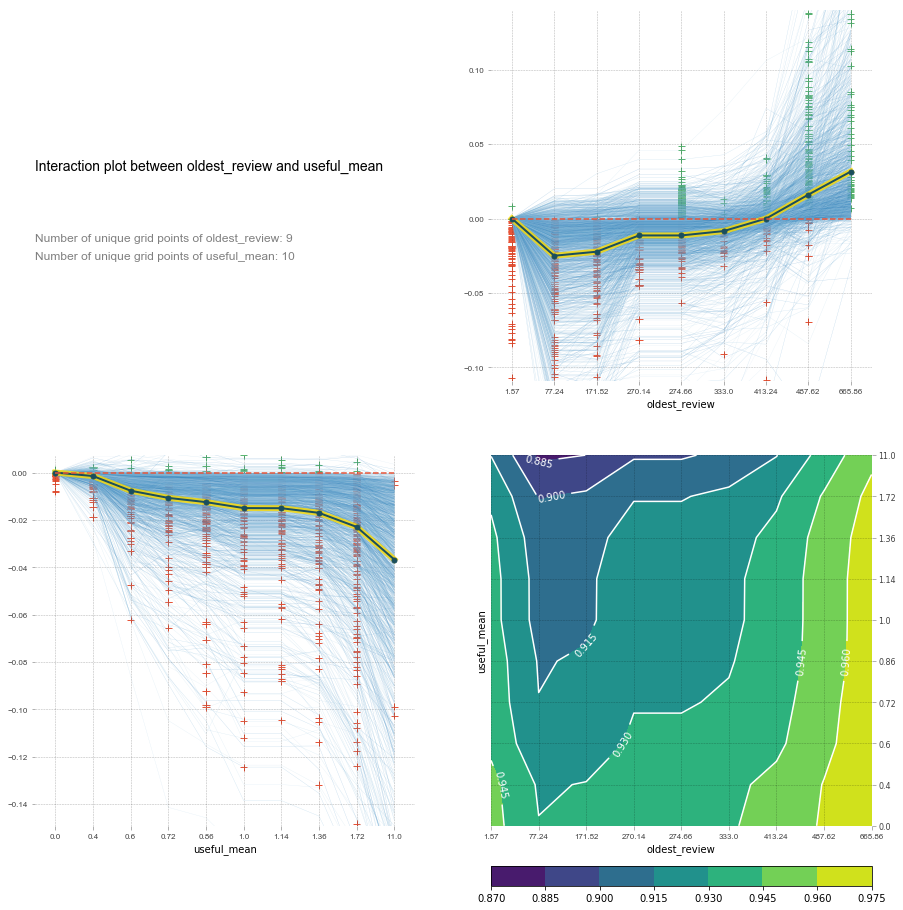

In [245]:
inter1 = pdp.pdp_interact(clf_2, X_test.iloc[6000:,:], ['oldest_review', 'useful_mean'])

plt.rcParams['figure.figsize'] = [18, 16]

pdp.pdp_interact_plot(inter1, ['oldest_review', 'useful_mean'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)

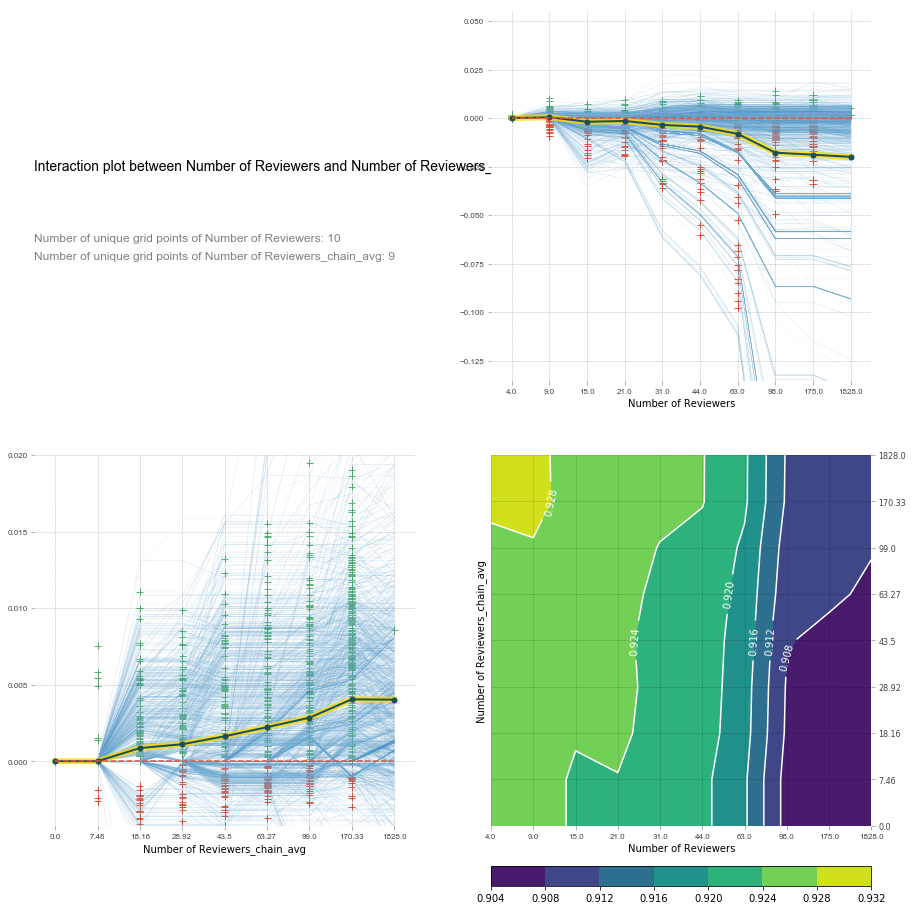

In [213]:
inter1 = pdp.pdp_interact(clf, X_test[cols].iloc[6000:,:], ['Number of Reviewers', 'Number of Reviewers_chain_avg'])

plt.rcParams['figure.figsize'] = [18, 16]

pdp.pdp_interact_plot(inter1, ['Number of Reviewers', 'Number of Reviewers_chain_avg'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)

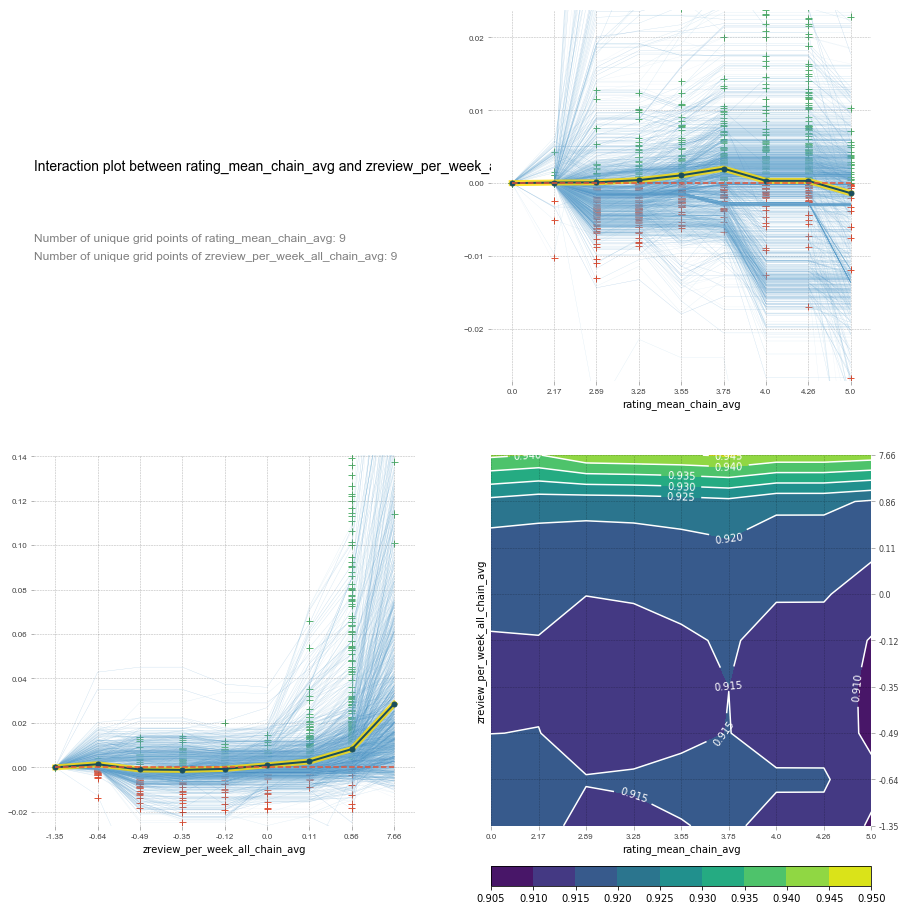

In [214]:
inter1 = pdp.pdp_interact(clf, X_test[cols].iloc[6000:,:], ['rating_mean_chain_avg', 'zreview_per_week_all_chain_avg'])

plt.rcParams['figure.figsize'] = [18, 16]

pdp.pdp_interact_plot(inter1, ['rating_mean_chain_avg', 'zreview_per_week_all_chain_avg'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)

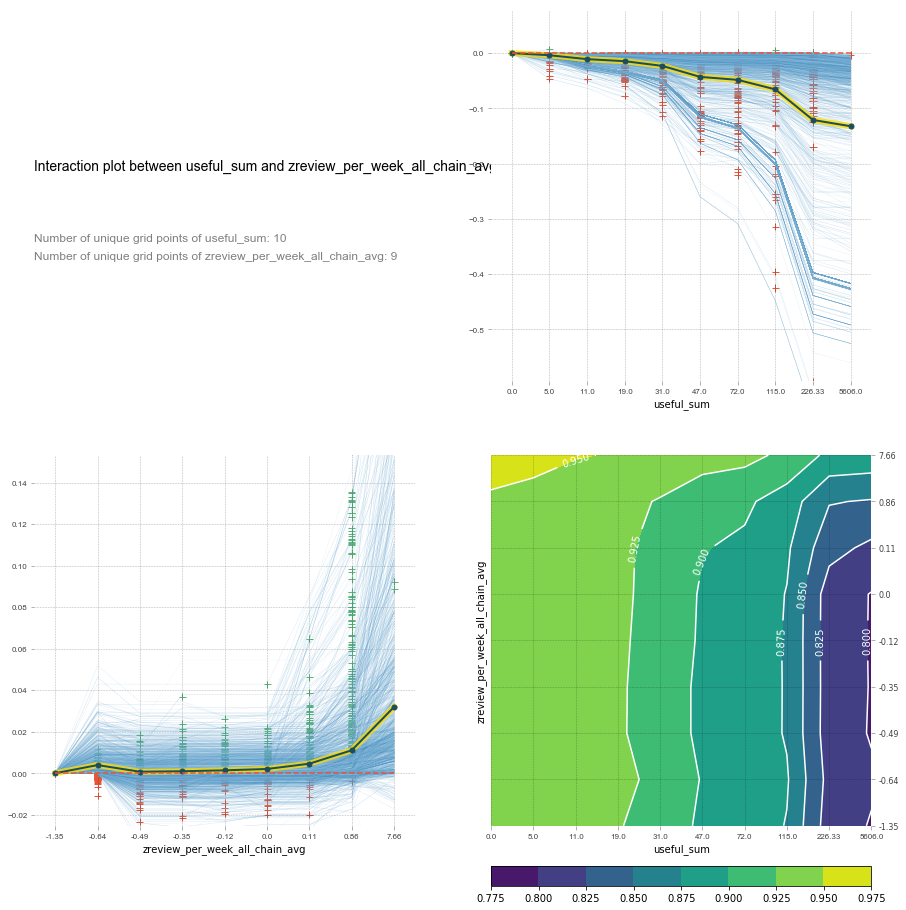

In [244]:
inter1 = pdp.pdp_interact(clf, X_test[cols].iloc[6000:,:], ['useful_sum', 'zreview_per_week_all_chain_avg'])

plt.rcParams['figure.figsize'] = [18, 16]

pdp.pdp_interact_plot(inter1, ['useful_sum', 'zreview_per_week_all_chain_avg'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)

In [202]:
X_test.head()

rating_std  rating_min  rating_sum  rating_mean  rating_max  \
14699    1.559108         1.0       177.0     3.277778         5.0   
14698    0.547723         4.0        23.0     4.600000         5.0   
14697    1.301691         1.0       982.0     4.074689         5.0   
14696    1.154701         2.0        21.0     3.000000         5.0   
14695    1.180194         1.0       268.0     4.187500         5.0   

       gender_std  gender_min  gender_sum  gender_mean  gender_max  \
14699    0.504349           0          26     0.481481           1   
14698    0.447214           0           4     0.800000           1   
14697    0.495729           0         103     0.427386           1   
14696    0.487950           0           2     0.285714           1   
14695    0.503706           0          31     0.484375           1   

          ...       Outdoor Seating_chain_std  Delivery_chain_std  \
14699     ...                             0.0                 0.0   
14698     ...                             0.0                 0.0   
14697     ...                             0.0                 0.0   
14696     ...                             0.0                 0.0   
14695     ...                             0.0                 0.0   

       Caters_chain_std  Bike Parking_chain_std  Noisy_chain_std  \
14699               0.0                     0.0              0.0   
14698               0.0                     0.0              0.0   
14697               0.0                     0.0              0.0   
14696               0.0                     0.0              0.0   
14695               0.0                     0.0              0.0   

       review_count_loc_chain_std  friends/review_chain_std  \
14699                   15.556349                  0.087565   
14698                    0.000000                  0.000000   
14697                    0.000000                  0.000000   
14696                    0.000000                  0.000000   
14695                    0.000000                  0.000000   

       first_min_last_sent_chain_std  diffs_mean    days_mean  
14699                       1.126809   79.094340  1956.259259  
14698                       0.000000   42.500000  2377.000000  
14697                       0.000000    3.037500  1678.423237  
14696                       0.000000  206.333333  2004.142857  
14695                       0.000000   13.809524  1574.484375  

[5 rows x 408 columns]

In [208]:
cols

['useful_sum',
 'zreview_per_week_all_chain_avg',
 'zstar_all_chain_std',
 'oldest_review_chain_avg',
 'Number of Reviewers_chain_avg',
 'zreview_count_all',
 'stars_linear_coef_chain_avg',
 'elite_count_std_chain_avg',
 'stars_linear_coef',
 'Number of Reviewers',
 'zstar_all',
 'rating_mean_chain_avg',
 'Connoisseur_chain_avg',
 'Food Aestheticist_chain_avg']

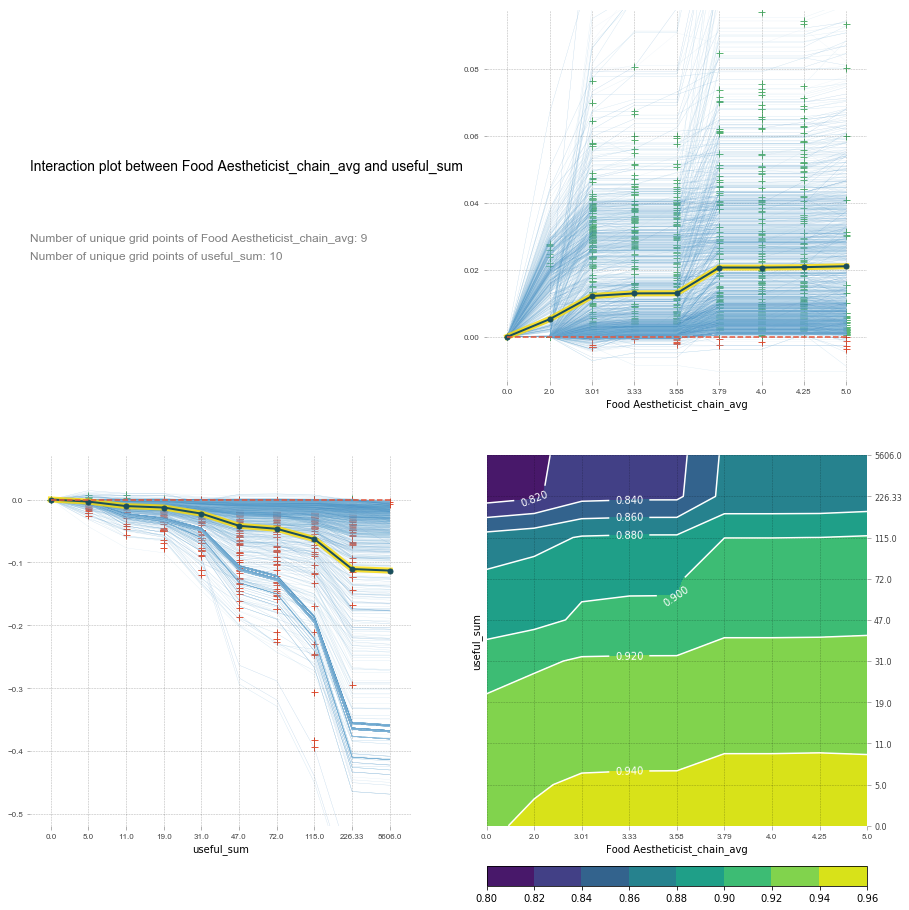

In [210]:
inter1 = pdp.pdp_interact(clf, X_test[cols].iloc[6000:,:], ['Food Aestheticist_chain_avg', 'useful_sum'])

plt.rcParams['figure.figsize'] = [18, 16]

pdp.pdp_interact_plot(inter1, ['Food Aestheticist_chain_avg', 'useful_sum'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)

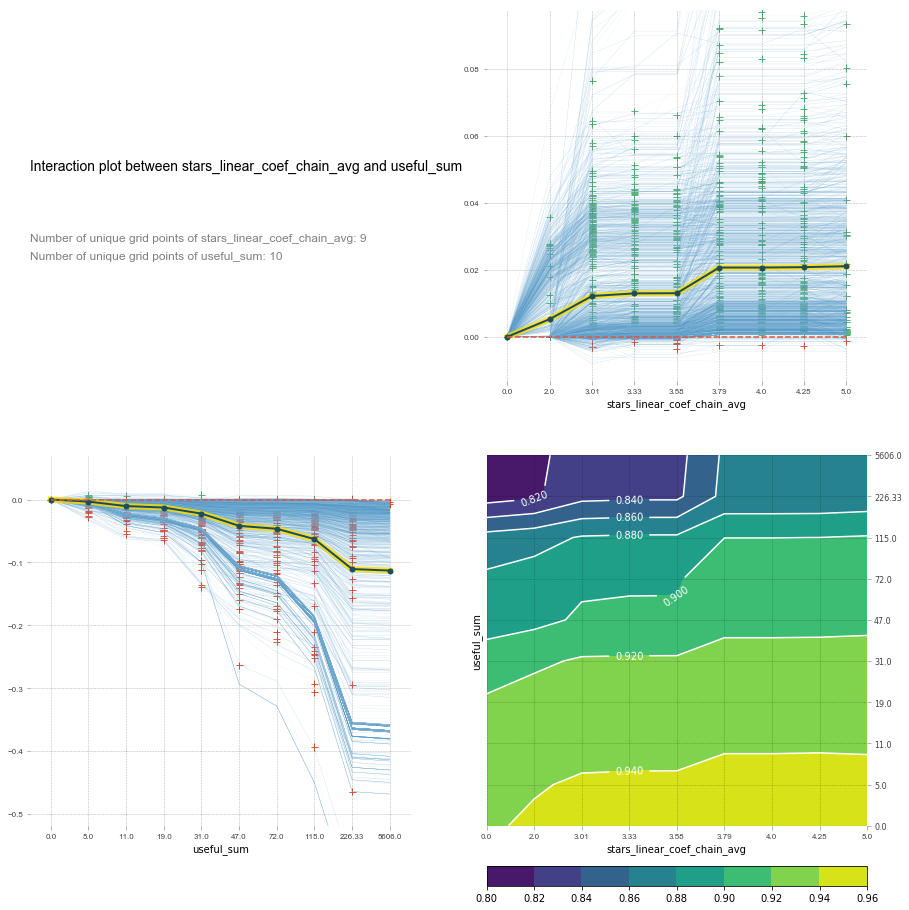

In [209]:
inter1 = pdp.pdp_interact(clf, X_test[cols].iloc[6000:,:], ['Food Aestheticist_chain_avg', 'useful_sum'])

plt.rcParams['figure.figsize'] = [18, 16]

pdp.pdp_interact_plot(inter1, ['Food Aestheticist_chain_avg', 'useful_sum'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)

In [247]:
X_test.filter(regex="stars").head()

std_of_stars  median_of_stars  stars_linear_coef  stars_sum  stars_mean  \
0      1.544604         4.000000          -0.000428      177.0    3.277778   
1      1.235705         3.725824          -0.000527       23.0    4.600000   
2      1.298987         5.000000           0.000017      982.0    4.074689   
3      1.235705         3.725824          -0.000527       21.0    3.000000   
4      1.170937         5.000000          -0.001012      268.0    4.187500   

   stars_std  average_stars_sum  average_stars_mean  average_stars_std  \
0   1.559108             184.65            3.419444           0.985243   
1   0.547723              21.31            4.262000           0.509038   
2   1.301691             946.18            3.926058           0.760544   
3   1.154701              27.27            3.895714           0.574075   
4   1.180194             241.46            3.772813           0.793418   

   std_of_stars_chain_avg             ...               \
0                1.455848             ...                
1                1.235705             ...                
2                1.298987             ...                
3                0.000000             ...                
4                1.170937             ...                

   average_stars_std_chain_avg  std_of_stars_chain_std  \
0                     0.885471                 0.12552   
1                     0.509038                 0.00000   
2                     0.760544                 0.00000   
3                     0.000000                 0.00000   
4                     0.793418                 0.00000   

   median_of_stars_chain_std  stars_linear_coef_chain_std  \
0                        0.0                     0.000138   
1                        0.0                     0.000000   
2                        0.0                     0.000000   
3                        0.0                     0.000000   
4                        0.0                     0.000000   

   stars_sum_chain_std  stars_mean_chain_std  stars_std_chain_std  \
0            52.325902              0.017574             0.129353   
1             0.000000              0.000000             0.000000   
2             0.000000              0.000000             0.000000   
3             0.000000              0.000000             0.000000   
4             0.000000              0.000000             0.000000   

   average_stars_sum_chain_std  average_stars_mean_chain_std  \
0                    65.718504                      0.164795   
1                     0.000000                      0.000000   
2                     0.000000                      0.000000   
3                     0.000000                      0.000000   
4                     0.000000                      0.000000   

   average_stars_std_chain_std  
0                     0.141099  
1                     0.000000  
2                     0.000000  
3                     0.000000  
4                     0.000000  

[5 rows x 27 columns]

In [249]:
inter1 = pdp.pdp_interact(clf, X_test.iloc[6000:,:], ['useful_sum', 'zreview_per_week_all_chain_avg'])

plt.rcParams['figure.figsize'] = [18, 16]

pdp.pdp_interact_plot(inter1, ['useful_sum', 'zreview_per_week_all_chain_avg'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)

ValueError: feature_names mismatch: ['useful_sum', 'zreview_per_week_all_chain_avg', 'zstar_all_chain_std', 'oldest_review_chain_avg', 'Number of Reviewers_chain_avg', 'zreview_count_all', 'stars_linear_coef_chain_avg', 'elite_count_std_chain_avg', 'stars_linear_coef', 'Number of Reviewers', 'zstar_all', 'oldest_review', 'rating_mean_chain_avg', 'Connoisseur_chain_avg', 'Food Aestheticist_chain_avg'] ['rating_std', 'rating_min', 'rating_sum', 'rating_mean', 'rating_max', 'gender_std', 'gender_min', 'gender_sum', 'gender_mean', 'gender_max', 'friend_count_std', 'friend_count_min', 'friend_count_sum', 'friend_count_mean', 'friend_count_max', 'photo_count_std', 'photo_count_min', 'photo_count_sum', 'photo_count_mean', 'photo_count_max', 'review_count_usr_std', 'review_count_usr_min', 'review_count_usr_sum', 'review_count_usr_mean', 'review_count_usr_max', 'senti_polarity_std', 'senti_polarity_min', 'senti_polarity_sum', 'senti_polarity_mean', 'senti_polarity_max', 'first_sent_mean', 'last_sent_mean', 'first_sent_std', 'last_sent_std', 'first_sent_sum', 'last_sent_sum', 'useful_std', 'useful_amin', 'useful_sum', 'useful_mean', 'useful_amax', 'funny_std', 'funny_amin', 'funny_sum', 'funny_mean', 'funny_amax', 'cool_std', 'cool_amin', 'cool_sum', 'cool_mean', 'cool_amax', 'latitude', 'longitude', 'rating_pub', 'count_categories', 'reviews_per_week', 'oldest_review', 'std_of_stars', 'median_of_stars', 'stars_linear_coef', 'reactions_per_week', 'restaurant_density', 'restaurant_similar_density', 'zreview_count_all', 'zreview_per_week_all', 'zstar_all', 'is_chain', 'stars_sum', 'stars_mean', 'stars_std', 'fans_sum', 'fans_mean', 'fans_std', 'average_stars_sum', 'average_stars_mean', 'average_stars_std', 'compliment_hot_sum', 'compliment_hot_mean', 'compliment_hot_std', 'compliment_more_sum', 'compliment_more_mean', 'compliment_more_std', 'compliment_profile_sum', 'compliment_profile_mean', 'compliment_profile_std', 'compliment_cute_sum', 'compliment_cute_mean', 'compliment_cute_std', 'compliment_list_sum', 'compliment_list_mean', 'compliment_list_std', 'compliment_note_sum', 'compliment_note_mean', 'compliment_note_std', 'compliment_plain_sum', 'compliment_plain_mean', 'compliment_plain_std', 'compliment_cool_sum', 'compliment_cool_mean', 'compliment_cool_std', 'compliment_funny_sum', 'compliment_funny_mean', 'compliment_funny_std', 'compliment_writer_sum', 'compliment_writer_mean', 'compliment_writer_std', 'compliment_photos_sum', 'compliment_photos_mean', 'compliment_photos_std', 'elite_count_sum', 'elite_count_mean', 'elite_count_std', 'Male to Female', 'Male', 'Female', 'High Network', 'Low Network', 'Connoisseur', 'Food Aestheticist', 'Patrons', 'First Visit', 'Female Importance', 'Average Customer Network', 'Total Network', 'Number of Reviewers', 'Convenience Level', 'Free Wi-Fi', 'Takes Reservations', 'Outdoor Seating', 'Delivery', 'Caters', 'Bike Parking', 'Noisy', 'review_count_loc', 'friends/review', 'first_min_last_sent', 'rating_std_chain_avg', 'rating_min_chain_avg', 'rating_sum_chain_avg', 'rating_mean_chain_avg', 'rating_max_chain_avg', 'gender_std_chain_avg', 'gender_min_chain_avg', 'gender_sum_chain_avg', 'gender_mean_chain_avg', 'gender_max_chain_avg', 'friend_count_std_chain_avg', 'friend_count_min_chain_avg', 'friend_count_sum_chain_avg', 'friend_count_mean_chain_avg', 'friend_count_max_chain_avg', 'photo_count_std_chain_avg', 'photo_count_min_chain_avg', 'photo_count_sum_chain_avg', 'photo_count_mean_chain_avg', 'photo_count_max_chain_avg', 'review_count_usr_std_chain_avg', 'review_count_usr_min_chain_avg', 'review_count_usr_sum_chain_avg', 'review_count_usr_mean_chain_avg', 'review_count_usr_max_chain_avg', 'senti_polarity_std_chain_avg', 'senti_polarity_min_chain_avg', 'senti_polarity_sum_chain_avg', 'senti_polarity_mean_chain_avg', 'senti_polarity_max_chain_avg', 'first_sent_mean_chain_avg', 'last_sent_mean_chain_avg', 'first_sent_std_chain_avg', 'last_sent_std_chain_avg', 'first_sent_sum_chain_avg', 'last_sent_sum_chain_avg', 'useful_std_chain_avg', 'useful_amin_chain_avg', 'useful_sum_chain_avg', 'useful_mean_chain_avg', 'useful_amax_chain_avg', 'funny_std_chain_avg', 'funny_amin_chain_avg', 'funny_sum_chain_avg', 'funny_mean_chain_avg', 'funny_amax_chain_avg', 'cool_std_chain_avg', 'cool_amin_chain_avg', 'cool_sum_chain_avg', 'cool_mean_chain_avg', 'cool_amax_chain_avg', 'latitude_chain_avg', 'longitude_chain_avg', 'rating_pub_chain_avg', 'count_categories_chain_avg', 'reviews_per_week_chain_avg', 'oldest_review_chain_avg', 'std_of_stars_chain_avg', 'median_of_stars_chain_avg', 'stars_linear_coef_chain_avg', 'reactions_per_week_chain_avg', 'restaurant_density_chain_avg', 'restaurant_similar_density_chain_avg', 'zreview_count_all_chain_avg', 'zreview_per_week_all_chain_avg', 'zstar_all_chain_avg', 'stars_sum_chain_avg', 'stars_mean_chain_avg', 'stars_std_chain_avg', 'fans_sum_chain_avg', 'fans_mean_chain_avg', 'fans_std_chain_avg', 'average_stars_sum_chain_avg', 'average_stars_mean_chain_avg', 'average_stars_std_chain_avg', 'compliment_hot_sum_chain_avg', 'compliment_hot_mean_chain_avg', 'compliment_hot_std_chain_avg', 'compliment_more_sum_chain_avg', 'compliment_more_mean_chain_avg', 'compliment_more_std_chain_avg', 'compliment_profile_sum_chain_avg', 'compliment_profile_mean_chain_avg', 'compliment_profile_std_chain_avg', 'compliment_cute_sum_chain_avg', 'compliment_cute_mean_chain_avg', 'compliment_cute_std_chain_avg', 'compliment_list_sum_chain_avg', 'compliment_list_mean_chain_avg', 'compliment_list_std_chain_avg', 'compliment_note_sum_chain_avg', 'compliment_note_mean_chain_avg', 'compliment_note_std_chain_avg', 'compliment_plain_sum_chain_avg', 'compliment_plain_mean_chain_avg', 'compliment_plain_std_chain_avg', 'compliment_cool_sum_chain_avg', 'compliment_cool_mean_chain_avg', 'compliment_cool_std_chain_avg', 'compliment_funny_sum_chain_avg', 'compliment_funny_mean_chain_avg', 'compliment_funny_std_chain_avg', 'compliment_writer_sum_chain_avg', 'compliment_writer_mean_chain_avg', 'compliment_writer_std_chain_avg', 'compliment_photos_sum_chain_avg', 'compliment_photos_mean_chain_avg', 'compliment_photos_std_chain_avg', 'elite_count_sum_chain_avg', 'elite_count_mean_chain_avg', 'elite_count_std_chain_avg', 'Male to Female_chain_avg', 'Male_chain_avg', 'Female_chain_avg', 'High Network_chain_avg', 'Low Network_chain_avg', 'Connoisseur_chain_avg', 'Food Aestheticist_chain_avg', 'Patrons_chain_avg', 'First Visit_chain_avg', 'Female Importance_chain_avg', 'Average Customer Network_chain_avg', 'Total Network_chain_avg', 'Number of Reviewers_chain_avg', 'Convenience Level_chain_avg', 'Free Wi-Fi_chain_avg', 'Takes Reservations_chain_avg', 'Outdoor Seating_chain_avg', 'Delivery_chain_avg', 'Caters_chain_avg', 'Bike Parking_chain_avg', 'Noisy_chain_avg', 'review_count_loc_chain_avg', 'friends/review_chain_avg', 'first_min_last_sent_chain_avg', 'rating_std_chain_std', 'rating_min_chain_std', 'rating_sum_chain_std', 'rating_mean_chain_std', 'rating_max_chain_std', 'gender_std_chain_std', 'gender_min_chain_std', 'gender_sum_chain_std', 'gender_mean_chain_std', 'gender_max_chain_std', 'friend_count_std_chain_std', 'friend_count_min_chain_std', 'friend_count_sum_chain_std', 'friend_count_mean_chain_std', 'friend_count_max_chain_std', 'photo_count_std_chain_std', 'photo_count_min_chain_std', 'photo_count_sum_chain_std', 'photo_count_mean_chain_std', 'photo_count_max_chain_std', 'review_count_usr_std_chain_std', 'review_count_usr_min_chain_std', 'review_count_usr_sum_chain_std', 'review_count_usr_mean_chain_std', 'review_count_usr_max_chain_std', 'senti_polarity_std_chain_std', 'senti_polarity_min_chain_std', 'senti_polarity_sum_chain_std', 'senti_polarity_mean_chain_std', 'senti_polarity_max_chain_std', 'first_sent_mean_chain_std', 'last_sent_mean_chain_std', 'first_sent_std_chain_std', 'last_sent_std_chain_std', 'first_sent_sum_chain_std', 'last_sent_sum_chain_std', 'useful_std_chain_std', 'useful_amin_chain_std', 'useful_sum_chain_std', 'useful_mean_chain_std', 'useful_amax_chain_std', 'funny_std_chain_std', 'funny_amin_chain_std', 'funny_sum_chain_std', 'funny_mean_chain_std', 'funny_amax_chain_std', 'cool_std_chain_std', 'cool_amin_chain_std', 'cool_sum_chain_std', 'cool_mean_chain_std', 'cool_amax_chain_std', 'latitude_chain_std', 'longitude_chain_std', 'rating_pub_chain_std', 'count_categories_chain_std', 'reviews_per_week_chain_std', 'oldest_review_chain_std', 'std_of_stars_chain_std', 'median_of_stars_chain_std', 'stars_linear_coef_chain_std', 'reactions_per_week_chain_std', 'restaurant_density_chain_std', 'restaurant_similar_density_chain_std', 'zreview_count_all_chain_std', 'zreview_per_week_all_chain_std', 'zstar_all_chain_std', 'stars_sum_chain_std', 'stars_mean_chain_std', 'stars_std_chain_std', 'fans_sum_chain_std', 'fans_mean_chain_std', 'fans_std_chain_std', 'average_stars_sum_chain_std', 'average_stars_mean_chain_std', 'average_stars_std_chain_std', 'compliment_hot_sum_chain_std', 'compliment_hot_mean_chain_std', 'compliment_hot_std_chain_std', 'compliment_more_sum_chain_std', 'compliment_more_mean_chain_std', 'compliment_more_std_chain_std', 'compliment_profile_sum_chain_std', 'compliment_profile_mean_chain_std', 'compliment_profile_std_chain_std', 'compliment_cute_sum_chain_std', 'compliment_cute_mean_chain_std', 'compliment_cute_std_chain_std', 'compliment_list_sum_chain_std', 'compliment_list_mean_chain_std', 'compliment_list_std_chain_std', 'compliment_note_sum_chain_std', 'compliment_note_mean_chain_std', 'compliment_note_std_chain_std', 'compliment_plain_sum_chain_std', 'compliment_plain_mean_chain_std', 'compliment_plain_std_chain_std', 'compliment_cool_sum_chain_std', 'compliment_cool_mean_chain_std', 'compliment_cool_std_chain_std', 'compliment_funny_sum_chain_std', 'compliment_funny_mean_chain_std', 'compliment_funny_std_chain_std', 'compliment_writer_sum_chain_std', 'compliment_writer_mean_chain_std', 'compliment_writer_std_chain_std', 'compliment_photos_sum_chain_std', 'compliment_photos_mean_chain_std', 'compliment_photos_std_chain_std', 'elite_count_sum_chain_std', 'elite_count_mean_chain_std', 'elite_count_std_chain_std', 'Male to Female_chain_std', 'Male_chain_std', 'Female_chain_std', 'High Network_chain_std', 'Low Network_chain_std', 'Connoisseur_chain_std', 'Food Aestheticist_chain_std', 'Patrons_chain_std', 'First Visit_chain_std', 'Female Importance_chain_std', 'Average Customer Network_chain_std', 'Total Network_chain_std', 'Number of Reviewers_chain_std', 'Convenience Level_chain_std', 'Free Wi-Fi_chain_std', 'Takes Reservations_chain_std', 'Outdoor Seating_chain_std', 'Delivery_chain_std', 'Caters_chain_std', 'Bike Parking_chain_std', 'Noisy_chain_std', 'review_count_loc_chain_std', 'friends/review_chain_std', 'first_min_last_sent_chain_std', 'diffs_mean', 'days_mean']
training data did not have the following fields: review_count_usr_max_chain_std, compliment_more_std_chain_avg, Total Network_chain_avg, std_of_stars_chain_avg, compliment_photos_mean, review_count_loc_chain_avg, friend_count_max_chain_avg, compliment_cool_mean, senti_polarity_std_chain_avg, longitude_chain_std, first_sent_std_chain_std, Connoisseur_chain_std, rating_min_chain_std, compliment_note_std, funny_mean_chain_avg, photo_count_sum, elite_count_std_chain_std, compliment_cool_mean_chain_std, friend_count_sum_chain_avg, last_sent_mean_chain_std, senti_polarity_min, compliment_cool_mean_chain_avg, Free Wi-Fi, rating_sum_chain_avg, funny_sum_chain_std, first_sent_sum_chain_avg, diffs_mean, first_sent_sum, friend_count_std, compliment_plain_mean_chain_avg, compliment_list_sum_chain_avg, compliment_more_sum, gender_min_chain_avg, senti_polarity_mean_chain_std, compliment_plain_mean_chain_std, cool_amin_chain_std, funny_amin_chain_avg, Convenience Level, zstar_all_chain_avg, gender_sum_chain_avg, friend_count_std_chain_std, compliment_cool_std_chain_std, friend_count_mean, First Visit_chain_avg, review_count_usr_sum_chain_std, compliment_writer_sum, compliment_hot_mean_chain_std, cool_std_chain_std, compliment_list_sum_chain_std, elite_count_mean_chain_std, Free Wi-Fi_chain_std, zreview_per_week_all, review_count_usr_max_chain_avg, fans_std_chain_std, longitude_chain_avg, compliment_plain_std_chain_avg, rating_min, review_count_loc, useful_sum_chain_std, Free Wi-Fi_chain_avg, compliment_list_mean, compliment_more_mean_chain_avg, compliment_photos_mean_chain_avg, first_sent_sum_chain_std, compliment_funny_sum, funny_amin, Convenience Level_chain_avg, useful_std_chain_std, Female_chain_std, last_sent_sum, Outdoor Seating, senti_polarity_std, compliment_writer_mean, Food Aestheticist, compliment_more_sum_chain_avg, last_sent_std_chain_avg, compliment_note_std_chain_std, Average Customer Network, Average Customer Network_chain_std, funny_amax_chain_avg, elite_count_sum_chain_avg, stars_linear_coef_chain_std, first_sent_std_chain_avg, review_count_usr_min_chain_avg, senti_polarity_mean_chain_avg, useful_sum_chain_avg, fans_mean_chain_avg, compliment_funny_mean_chain_avg, compliment_writer_sum_chain_std, latitude_chain_avg, rating_sum_chain_std, Female, photo_count_std, Outdoor Seating_chain_avg, compliment_writer_mean_chain_avg, fans_mean, friend_count_min_chain_avg, useful_amax_chain_std, gender_max_chain_avg, review_count_usr_mean_chain_std, Noisy, compliment_plain_sum_chain_avg, std_of_stars_chain_std, compliment_photos_std, compliment_hot_sum, Male to Female_chain_avg, compliment_profile_std_chain_std, Male to Female_chain_std, last_sent_std_chain_std, rating_max_chain_avg, compliment_note_std_chain_avg, funny_mean, gender_std_chain_std, compliment_funny_std_chain_avg, Takes Reservations_chain_std, reactions_per_week_chain_std, first_min_last_sent_chain_std, compliment_writer_mean_chain_std, stars_sum_chain_std, funny_std, count_categories_chain_std, Caters, photo_count_mean_chain_std, senti_polarity_min_chain_std, photo_count_max, useful_mean_chain_avg, gender_min, photo_count_min, compliment_cute_std_chain_avg, useful_mean_chain_std, Delivery_chain_avg, compliment_more_std, stars_std, High Network, Bike Parking_chain_avg, review_count_usr_std_chain_std, reviews_per_week_chain_avg, photo_count_sum_chain_std, stars_mean_chain_std, Takes Reservations_chain_avg, median_of_stars, compliment_hot_mean, Total Network_chain_std, compliment_photos_std_chain_std, funny_sum_chain_avg, cool_mean_chain_avg, count_categories, last_sent_mean, zreview_count_all_chain_std, friend_count_mean_chain_std, Female Importance, first_min_last_sent, average_stars_sum, Bike Parking_chain_std, fans_sum, cool_std_chain_avg, restaurant_similar_density_chain_std, fans_mean_chain_std, photo_count_min_chain_avg, stars_sum_chain_avg, median_of_stars_chain_avg, restaurant_density, restaurant_similar_density_chain_avg, Patrons, compliment_list_sum, compliment_plain_sum, restaurant_density_chain_avg, compliment_profile_mean_chain_std, compliment_hot_std, compliment_note_mean_chain_std, senti_polarity_sum_chain_std, compliment_more_mean, review_count_usr_sum, Average Customer Network_chain_avg, Female_chain_avg, last_sent_sum_chain_std, average_stars_std_chain_avg, stars_sum, Patrons_chain_std, useful_std, compliment_list_mean_chain_avg, photo_count_std_chain_avg, friend_count_mean_chain_avg, compliment_funny_std, rating_std_chain_std, friend_count_std_chain_avg, average_stars_sum_chain_avg, compliment_cool_sum, funny_amin_chain_std, review_count_usr_std_chain_avg, photo_count_min_chain_std, cool_amax_chain_std, gender_max, useful_amax, rating_std_chain_avg, friend_count_sum, compliment_cool_std_chain_avg, compliment_plain_std_chain_std, Noisy_chain_std, gender_mean_chain_std, rating_pub, elite_count_std, review_count_usr_max, Low Network, funny_amax, reviews_per_week_chain_std, cool_amax, compliment_hot_mean_chain_avg, fans_sum_chain_avg, Low Network_chain_avg, First Visit, zreview_per_week_all_chain_std, compliment_writer_std, useful_amin, compliment_hot_std_chain_std, funny_sum, friends/review_chain_avg, gender_max_chain_std, cool_mean, compliment_writer_std_chain_avg, Male, gender_sum_chain_std, reactions_per_week, compliment_list_std_chain_std, elite_count_mean, latitude, compliment_profile_mean_chain_avg, compliment_note_mean, photo_count_max_chain_std, cool_amax_chain_avg, friends/review_chain_std, Female Importance_chain_std, gender_std_chain_avg, compliment_photos_sum_chain_avg, review_count_usr_min_chain_std, average_stars_sum_chain_std, elite_count_sum, Patrons_chain_avg, review_count_usr_mean, friend_count_min_chain_std, is_chain, Food Aestheticist_chain_std, cool_mean_chain_std, rating_sum, High Network_chain_std, compliment_list_std_chain_avg, first_sent_mean_chain_std, restaurant_similar_density, stars_std_chain_avg, review_count_usr_std, compliment_photos_std_chain_avg, friend_count_min, compliment_funny_sum_chain_std, friend_count_max, Takes Reservations, gender_sum, first_sent_mean_chain_avg, compliment_cute_mean_chain_avg, longitude, gender_min_chain_std, compliment_funny_sum_chain_avg, gender_mean, compliment_profile_sum, Noisy_chain_avg, compliment_funny_mean, compliment_profile_sum_chain_std, compliment_cool_std, compliment_plain_sum_chain_std, useful_amax_chain_avg, First Visit_chain_std, Male_chain_avg, cool_sum_chain_std, Convenience Level_chain_std, senti_polarity_max, average_stars_mean_chain_avg, stars_mean_chain_avg, compliment_photos_mean_chain_std, Total Network, average_stars_std_chain_std, compliment_list_mean_chain_std, Caters_chain_std, count_categories_chain_avg, senti_polarity_max_chain_avg, photo_count_mean, std_of_stars, compliment_note_sum, review_count_usr_mean_chain_avg, friends/review, average_stars_std, compliment_hot_sum_chain_std, reviews_per_week, first_sent_mean, compliment_cute_std_chain_std, rating_mean, compliment_photos_sum, compliment_photos_sum_chain_std, rating_mean_chain_std, review_count_usr_min, funny_std_chain_std, Low Network_chain_std, compliment_writer_sum_chain_avg, useful_std_chain_avg, rating_pub_chain_std, cool_amin, gender_mean_chain_avg, compliment_writer_std_chain_std, useful_amin_chain_std, senti_polarity_std_chain_std, funny_amax_chain_std, compliment_plain_std, reactions_per_week_chain_avg, cool_sum_chain_avg, friend_count_max_chain_std, compliment_funny_mean_chain_std, compliment_cute_sum, Connoisseur, days_mean, compliment_cool_sum_chain_std, compliment_hot_std_chain_avg, first_sent_std, compliment_hot_sum_chain_avg, compliment_cute_mean_chain_std, last_sent_sum_chain_avg, last_sent_mean_chain_avg, compliment_list_std, cool_sum, average_stars_mean_chain_std, Delivery_chain_std, compliment_cute_sum_chain_std, stars_mean, compliment_note_sum_chain_avg, friend_count_sum_chain_std, compliment_more_std_chain_std, senti_polarity_mean, compliment_profile_std_chain_avg, latitude_chain_std, High Network_chain_avg, photo_count_sum_chain_avg, stars_std_chain_std, compliment_plain_mean, review_count_usr_sum_chain_avg, rating_min_chain_avg, compliment_profile_sum_chain_avg, compliment_cool_sum_chain_avg, review_count_loc_chain_std, elite_count_sum_chain_std, cool_amin_chain_avg, compliment_profile_mean, average_stars_mean, Bike Parking, compliment_profile_std, senti_polarity_min_chain_avg, Female Importance_chain_avg, Male_chain_std, fans_std, rating_pub_chain_avg, photo_count_mean_chain_avg, fans_sum_chain_std, Caters_chain_avg, fans_std_chain_avg, Male to Female, zreview_count_all_chain_avg, photo_count_std_chain_std, elite_count_mean_chain_avg, funny_std_chain_avg, compliment_funny_std_chain_std, senti_polarity_sum_chain_avg, useful_amin_chain_avg, median_of_stars_chain_std, Outdoor Seating_chain_std, photo_count_max_chain_avg, compliment_cute_mean, last_sent_std, rating_max, compliment_more_sum_chain_std, cool_std, oldest_review_chain_std, restaurant_density_chain_std, useful_mean, compliment_note_mean_chain_avg, rating_max_chain_std, first_min_last_sent_chain_avg, senti_polarity_sum, compliment_more_mean_chain_std, funny_mean_chain_std, rating_std, compliment_cute_sum_chain_avg, Number of Reviewers_chain_std, Delivery, gender_std, senti_polarity_max_chain_std, compliment_cute_std, compliment_note_sum_chain_std

In [257]:
inter1 = pdp.pdp_interact(clf, X_test[cols].iloc[6000:,:], ['Connoisseur', 'useful_sum'])

plt.rcParams['figure.figsize'] = [18, 16]

pdp.pdp_interact_plot(inter1, ['stars_linear_coef', 'useful_sum'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)

ValueError: feature does not exist: Connoisseur

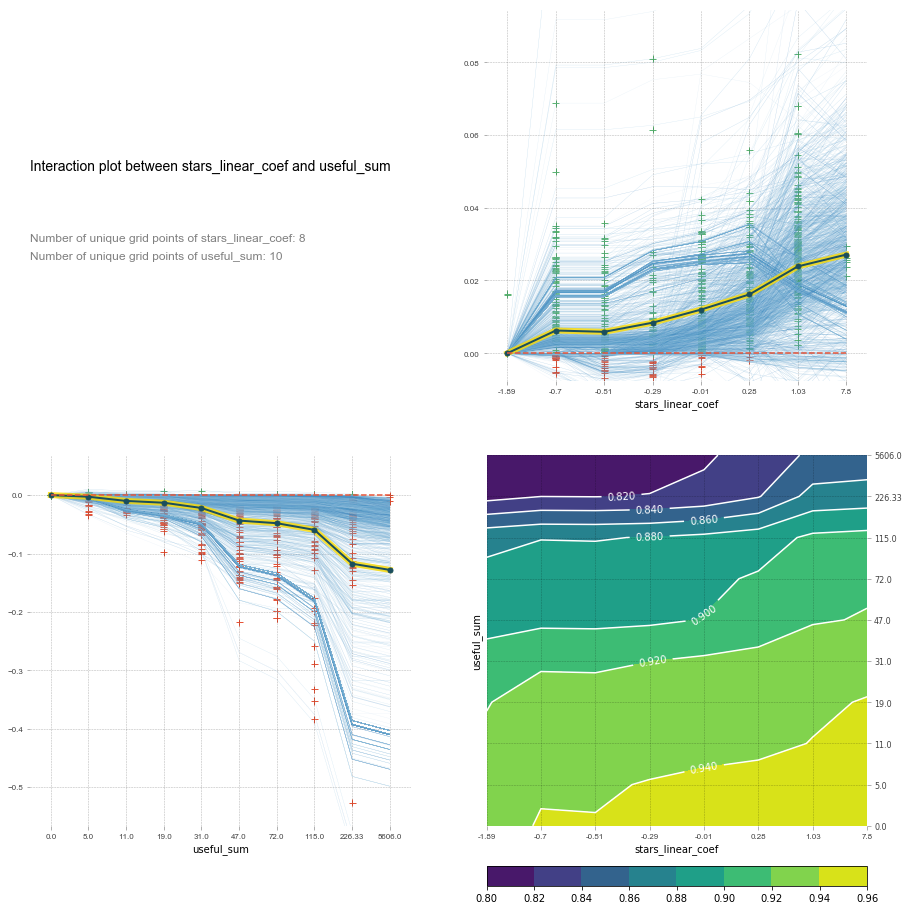

In [256]:
inter1 = pdp.pdp_interact(clf, X_test[cols].iloc[6000:,:], ['zreview_count_all', 'useful_sum'])

plt.rcParams['figure.figsize'] = [18, 16]

pdp.pdp_interact_plot(inter1, ['stars_linear_coef', 'useful_sum'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)

In [187]:
%matplotlib inline
plt.show()

In [ ]:
### For me I obviously just want the fastest one, there is no reason or me to squeeze erofrmance out of this. 